# Chapter 8 Visualizing data distribution

You may have noticed that numerical data is often summarized with the average value. For example, the quality of a high school is sometimes summarized with one number: the average score on a standardized test. Occasionally, a second number is reported: the standard deviation. For example, you might read a report stating that scores were 680 plus or minus 50 (the standard deviation). The report has summarized an entire vector of scores with just two numbers. Is this appropriate? Is there any important piece of information that we are missing by only looking at this summary rather than the entire list?

Our first data visualization building block is learning to summarize lists of factors or numeric vectors. More often than not, the best way to share or explore this summary is through data visualization. The most basic statistical summary of a list of objects or numbers is its distribution. Once a vector has been summarized as a distribution, there are several data visualization techniques to effectively relay this information.

In this chapter, we first discuss properties of a variety of distributions and how to visualize distributions using a motivating example of student heights. We then discuss the __ggplot2__ geometries for these visualizations in Section 8.16.

## 8.1 Variable types

We will be working with two types of variables: categorical and numeric. Each can be divided into two other groups: categorical can be ordinal or not, whereas numerical variables can be discrete or continuous.

When each entry in a vector comes from one of a small number of groups, we refer to the data as _categorical data_. Two simple examples are sex (male or female) and regions (Northeast, South, North Central, West). Some categorical data can be ordered even if they are not numbers per se, such as spiciness (mild, medium, hot). In statistics textbooks, ordered categorical data are referred to as _ordinal data_.

Examples of numerical data are population sizes, murder rates, and heights. Some numerical data can be treated as ordered categorical. We can further divide numerical data into continuous and discrete. Continuous variables are those that can take any value, such as heights, if measured with enough precision. For example, a pair of twins may be 68.12 and 68.11 inches, respectively. Counts, such as population sizes, are discrete because they have to be round numbers.

Keep in mind that discrete numeric data can be considered ordinal. Although this is technically true, we usually reserve the term ordinal data for variables belonging to a small number of different groups, with each group having many members. In contrast, when we have many groups with few cases in each group, we typically refer to them as discrete numerical variables. So, for example, the number of packs of cigarettes a person smokes a day, rounded to the closest pack, would be considered ordinal, while the actual number of cigarettes would be considered a numerical variable. But, indeed, there are examples that can be considered both numerical and ordinal when it comes to visualizing data.

## 8.2 Case study: describing student heights

Here we introduce a new motivating problem. It is an artificial one, but it will help us illustrate the concepts needed to understand distributions.

Pretend that we have to describe the heights of our classmates to ET, an extraterrestrial that has never seen humans. As a first step, we need to collect data. To do this, we ask students to report their heights in inches. We ask them to provide sex information because we know there are two different distributions by sex. We collect the data and save it in the `heights` data frame:

In [1]:
library(tidyverse)
library(dslabs)
data(heights)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.2     √ purrr   0.3.4
√ tibble  3.0.3     √ dplyr   1.0.2
√ tidyr   1.1.2     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



One way to convey the heights to ET is to simply send him this list of 1050 heights. But there are much more effective ways to convey this information, and understanding the concept of a distribution will help. To simplify the explanation, we first focus on male heights. We examine the female height data in Section 8.14.

## 8.3 Distribution function

It turns out that, in some cases, the average and the standard deviation are pretty much all we need to understand the data. We will learn data visualization techniques that will help us determine when this two number summary is appropriate. These same techniques will serve as an alternative for when two numbers are not enough.

The most basic statistical summary of a list of objects or numbers is its distribution. The simplest way to think of a distribution is as a compact description of a list with many entries. This concept should not be new for readers of this book. For example, with categorical data, the distribution simply describes the proportion of each unique category. The sex represented in the heights dataset is:

In [2]:
#> 
#> Female   Male 
#>  0.227  0.773

This two-category _frequency table_ is the simplest form of a distribution. We don’t really need to visualize it since one number describes everything we need to know: 23% are females and the rest are males. When there are more categories, then a simple barplot describes the distribution. Here is an example with US state regions:

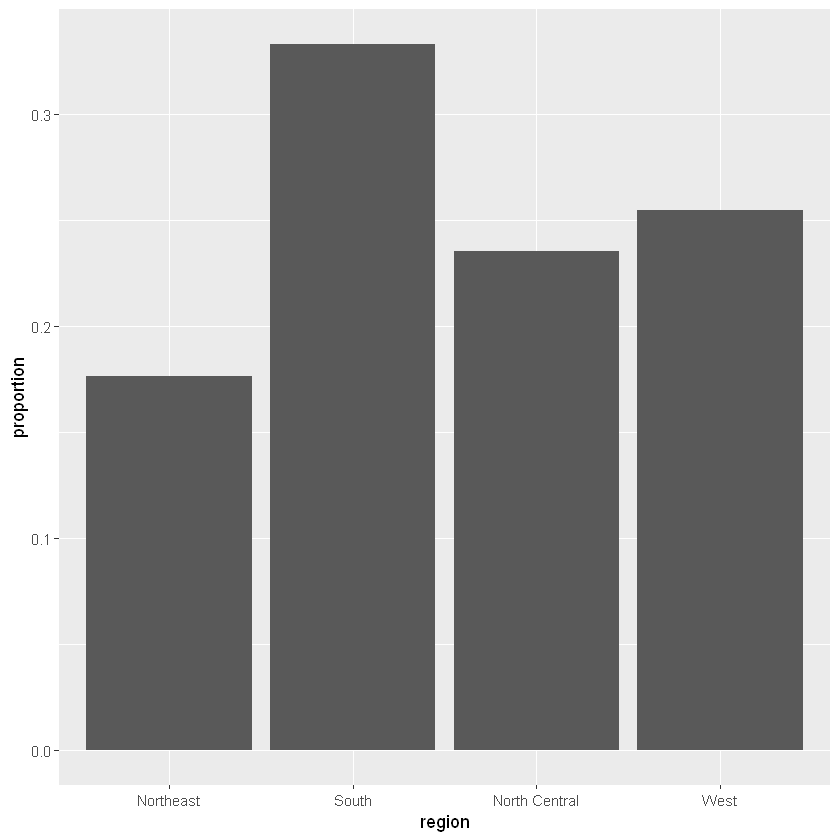

In [49]:
data(murders)
tab <- murders %>% count(region) %>% mutate(proportion = n/sum(n))
tab %>% ggplot(aes(region, proportion)) + geom_bar(stat = "identity")

This particular plot simply shows us four numbers, one for each category. We usually use barplots to display a few numbers. Although this particular plot does not provide much more insight than a frequency table itself, it is a first example of how we convert a vector into a plot that succinctly summarizes all the information in the vector. When the data is numerical, the task of displaying distributions is more challenging.

## 8.4 Cumulative distribution functions

Numerical data that are not categorical also have distributions. In general, when data is not categorical, reporting the frequency of each entry is not an effective summary since most entries are unique. In our case study, while several students reported a height of 68 inches, only one student reported a height of `68.503937007874` inches and only one student reported a height `68.8976377952756` inches. We assume that they converted from 174 and 175 centimeters, respectively.

Statistics textbooks teach us that a more useful way to define a distribution for numeric data is to define a function that reports the proportion of the data below $a$ for all possible values of $a$. This function is called the cumulative distribution function (CDF). In statistics, the following notation is used:
$$ F(a) = Pr(x \leq a) $$
Here is a plot of $F$ for the male height data:



In [8]:
#CDF of heights

Similar to what the frequency table does for categorical data, the CDF defines the distribution for numerical data. From the plot, we can see that 16% of the values are below 65, since $F(66) = 0.164$, or that 84% of the values are below 72, since $F(72) = 0.841$, and so on. In fact, we can report the proportion of values between any two heights, say $a$ and $b$, by computing $F(b)-F(a)$. This means that if we send the plot above to ET, he will have all the information needed to reconstruct the entire list. Paraphrasing the expression “a picture is worth a thousand words”, in this case, a picture is as informative as 812 numbers.

A final note: because CDFs can be defined mathematically the word _empirical_ is added to make the distinction when data is used. We therefore use the term empirical CDF (eCDF).

## 8.5 Histograms

Although the CDF concept is widely discussed in statistics textbooks, the plot is actually not very popular in practice. The main reason is that it does not easily convey characteristics of interest such as: at what value is the distribution centered? Is the distribution symmetric? What ranges contain 95% of the values? Histograms are much preferred because they greatly facilitate answering such questions. Histograms sacrifice just a bit of information to produce plots that are much easier to interpret.

The simplest way to make a histogram is to divide the span of our data into non-overlapping bins of the same size. Then, for each bin, we count the number of values that fall in that interval. The histogram plots these counts as bars with the base of the bar defined by the intervals. Here is the histogram for the height data splitting the range of values into one inch intervals:
$(49.5, 50.5], (50.5,51.5],(51.5,52.5],(52.5,53.5],\ldots,(82.5,83.5]$


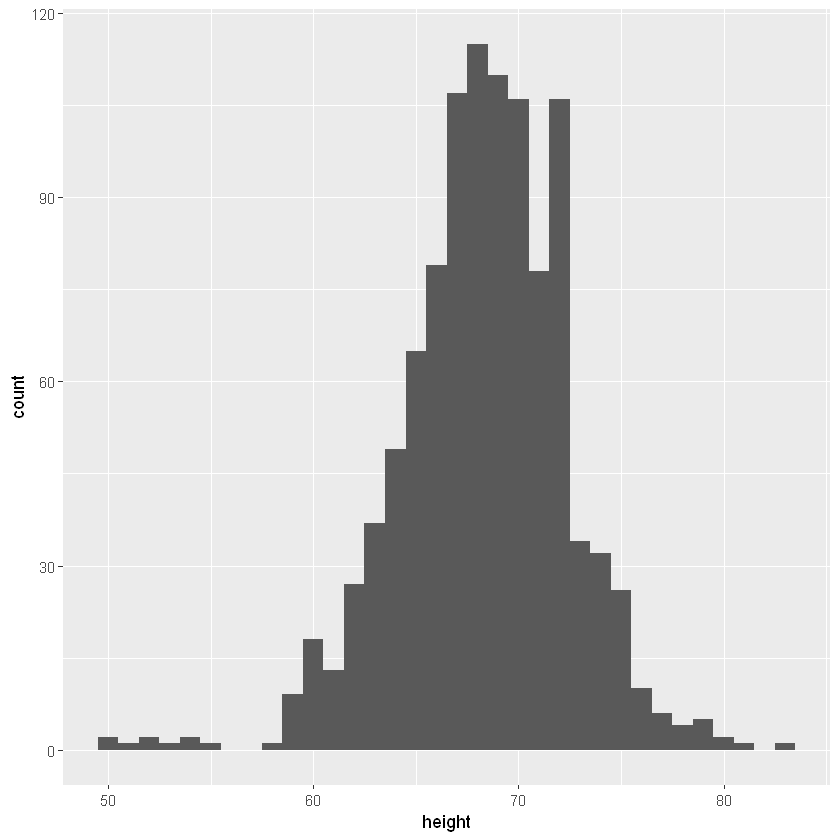

In [5]:
heights %>%
    ggplot(aes(height)) +
    geom_histogram(binwidth = 1)

As you can see in the figure above, a histogram is similar to a barplot, but it differs in that the x-axis is numerical, not categorical.

If we send this plot to ET, he will immediately learn some important properties about our data. First, the range of the data is from 50 to 84 with the majority (more than 95%) between 63 and 75 inches. Second, the heights are close to symmetric around 69 inches. Also, by adding up counts, ET could obtain a very good approximation of the proportion of the data in any interval. Therefore, the histogram above is not only easy to interpret, but also provides almost all the information contained in the raw list of 812 heights with about 30 bin counts.

What information do we lose? Note that all values in each interval are treated the same when computing bin heights. So, for example, the histogram does not distinguish between 64, 64.1, and 64.2 inches. Given that these differences are almost unnoticeable to the eye, the practical implications are negligible and we were able to summarize the data to just 23 numbers.

We discuss how to code histograms in Section 8.16.

## 8.6 Smoothed density

Smooth density plots are aesthetically more appealing than histograms. Here is what a smooth density plot looks like for our heights data:

In [9]:
# image for smoothed density

In this plot, we no longer have sharp edges at the interval boundaries and many of the local peaks have been removed. Also, the scale of the y-axis changed from counts to density.

To understand the smooth densities, we have to understand estimates, a topic we don’t cover until later. However, we provide a heuristic explanation to help you understand the basics so you can use this useful data visualization tool.

The main new concept you must understand is that we assume that our list of observed values is a subset of a much larger list of unobserved values. In the case of heights, you can imagine that our list of 812 male students comes from a hypothetical list containing all the heights of all the male students in all the world measured very precisely. Let’s say there are 1,000,000 of these measurements. This list of values has a distribution, like any list of values, and this larger distribution is really what we want to report to ET since it is much more general. Unfortunately, we don’t get to see it.

However, we make an assumption that helps us perhaps approximate it. If we had 1,000,000 values, measured very precisely, we could make a histogram with very, very small bins. The assumption is that if we show this, the height of consecutive bins will be similar. This is what we mean by smooth: we don’t have big jumps in the heights of consecutive bins. Below we have a hypothetical histogram with bins of size 1:

In [10]:
#height-conunt barplot

The smaller we make the bins, the smoother the histogram gets. Here are the histograms with bin width of 1, 0.5, and 0.1:

In [11]:
# barplot of count against height with binwidth = 1, 0.5, 0.1

The smooth density is basically the curve that goes through the top of the histogram bars when the bins are very, very small. To make the curve not depend on the hypothetical size of the hypothetical list, we compute the curve on frequencies rather than counts:

In [12]:
#pdf for height

Now, back to reality. We don’t have millions of measurements. Instead, we have 812 and we can’t make a histogram with very small bins.

We therefore make a histogram, using bin sizes appropriate for our data and computing frequencies rather than counts, and we draw a smooth curve that goes through the tops of the histogram bars. The following plots demonstrate the steps that lead to a smooth density:



In [13]:
# 6 plots 

However, remember that _smooth_ is a relative term. We can actually control the smoothness of the curve that defines the smooth density through an option in the function that computes the smooth density curve. Here are two examples using different degrees of smoothness on the same histogram:

In [14]:
# 2 plots with low smoothness and high smoothness

We need to make this choice with care as the resulting visualizations can change our interpretation of the data. We should select a degree of smoothness that we can defend as being representative of the underlying data. In the case of height, we really do have reason to believe that the proportion of people with similar heights should be the same. For example, the proportion that is 72 inches should be more similar to the proportion that is 71 than to the proportion that is 78 or 65. This implies that the curve should be pretty smooth; that is, the curve should look more like the example on the right than on the left.

While the histogram is an assumption-free summary, the smoothed density is based on some assumptions.

### 8.6.1 Interpreting the y-axis

Note that interpreting the y-axis of a smooth density plot is not straightforward. It is scaled so that the area under the density curve adds up to 1. If you imagine we form a bin with a base 1 unit in length, the y-axis value tells us the proportion of values in that bin. However, this is only true for bins of size 1. For other size intervals, the best way to determine the proportion of data in that interval is by computing the proportion of the total area contained in that interval. For example, here are the proportion of values between 65 and 68:



In [15]:
#image with colored area from 65 to 68

The proportion of this area is about 0.3, meaning that about 30% of male heights are between 65 and 68 inches.

By understanding this, we are ready to use the smooth density as a summary. For this dataset, we would feel quite comfortable with the smoothness assumption, and therefore with sharing this aesthetically pleasing figure with ET, which he could use to understand our male heights data:

In [16]:
#image

### 8.6.2 Densities permit stratification

As a final note, we point out that an advantage of smooth densities over histograms for visualization purposes is that densities make it easier to compare two distributions. This is in large part because the jagged edges of the histogram add clutter. Here is an example comparing male and female heights:

With the right argument, `ggplot` automatically shades the intersecting region with a different color. We will show examples of __ggplot2__ code for densities in Section 9 as well as Section 8.16.

## 8.7 Exercises

1. In the `murders` dataset, the region is a categorical variable and the following is its distribution:

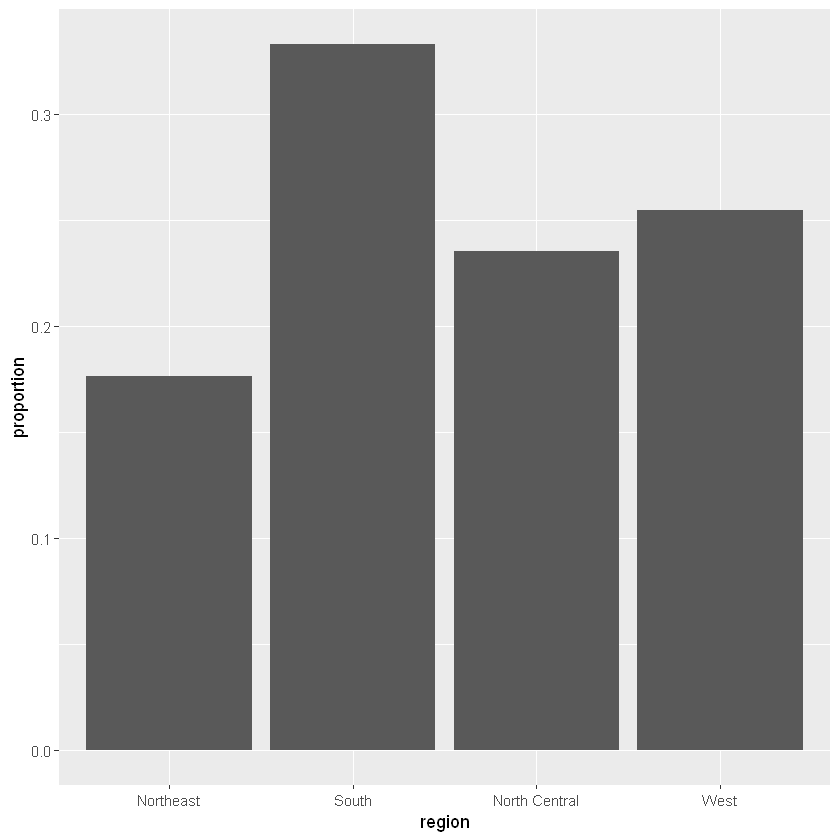

In [17]:
data(murders)
tab <- murders %>% count(region) %>% mutate(proportion = n/sum(n))
tab %>% ggplot(aes(region, proportion)) + geom_bar(stat = "identity")

To the closest 5%, what proportion of the states are in the North Central region?

__Answer__: 25%


2. Which of the following is true:

 a. The graph above is a histogram.
 
 b. The graph above shows only four numbers with a bar plot.
 
 c. Categories are not numbers, so it does not make sense to graph the distribution.
 
 d. The colors, not the height of the bars, describe the distribution.
 
 __Answer__: a
 


3. The plot below shows the eCDF for male heights:

In [18]:
#image

Based on the plot, what percentage of males are shorter than 75 inches?

 a. 100%
 
 b. 95%
 
 c. 80%
 
 d. 72 inches

__Answer__: b 


4. To the closest inch, what height 'm' has the property that 1/2 of the male students are taller than 'm' and 1/2 are shorter?

 a. 61 inches

 b. 64 inches
 
 c. 69 inches
 
 d. 74 inches
 
__Answer__: c



5. Here is an eCDF of the murder rates across states:

In [19]:
#images

Knowing that there are 51 states (counting DC) and based on this plot, how many states have murder rates larger than 10 per 100,000 people?

a. 1

b. 5

c. 10

d. 50

__Answer__; a

6. Based on the eCDF above, which of the following statements are true:

 a. About half the states have murder rates above 7 per 100,000 and the other half below.
 
 b. Most states have murder rates below 2 per 100,000.
 
 c. All the states have murder rates above 2 per 100,000.
 
 d. With the exception of 4 states, the murder rates are below 5 per 100,000.

__Answer__: d 
 
a: About half the state have murder rates above 2.5 per 100,000 and the other half below.

b: Most states have murder rates below 5 per 100,000.

c: Almost states have murders rates above 0.5 per 100,000.

7. Below is a histogram of male heights in our heights dataset:

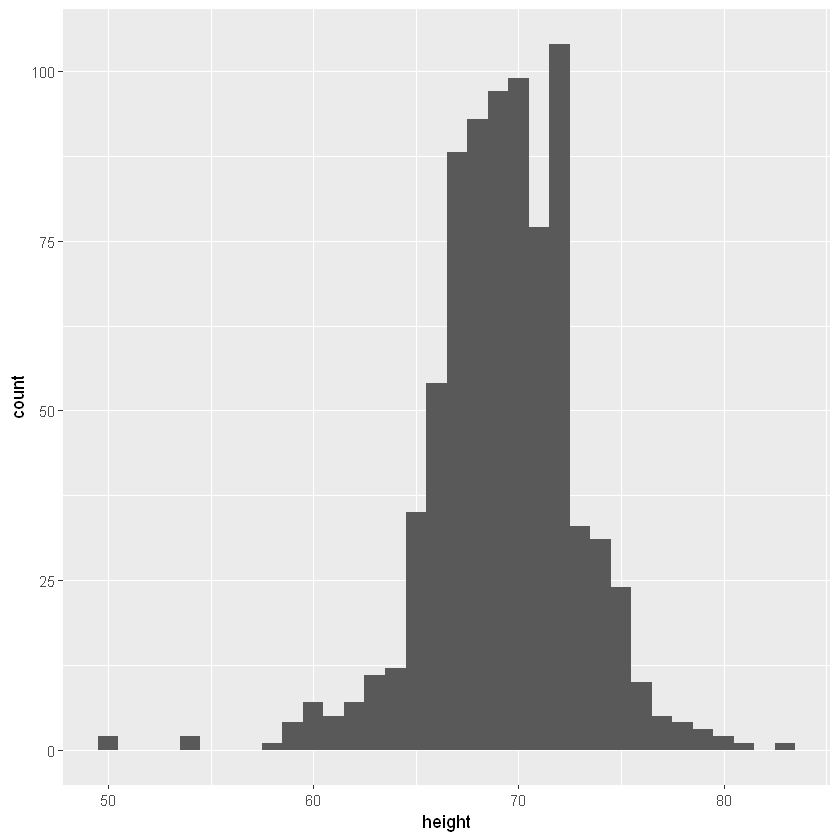

In [22]:
heights %>%
    filter(sex == "Male") %>%
    ggplot(aes(height)) +
    geom_histogram(binwidth = 1)

Based on this plot, how many males are between 63.5 and 65.5?

__Answer__: c. 34


8. About what __percentage__ are shorter than 60 inches?

Answer: a.1%

9. Based on the density plot below, about what proportion of US states have populations larger than 10 million?

Answer: b. 0.15



10. Below are three density plots. Is it possible that they are from the same dataset?


In [23]:
# image

Which of the following statements is true:

a. It is impossible that they are from the same dataset.

b. They are from the same dataset, but the plots are different due to code errors.

c. They are the same dataset, but the first and second plot undersmooth and the third oversmooths.

d. They are the same dataset, but the first is not in the log scale, the second undersmooths, and the third oversmooths.

__Amswer__: d



## 8.8 The normal distribution

Histograms and density plots provide excellent summaries of a distribution. But can we summarize even further? We often see the average and standard deviation used as summary statistics: a two-number summary! To understand what these summaries are and why they are so widely used, we need to understand the normal distribution.

The normal distribution, also known as the bell curve and as the Gaussian distribution, is one of the most famous mathematical concepts in history. A reason for this is that approximately normal distributions occur in many situations, including gambling winnings, heights, weights, blood pressure, standardized test scores, and experimental measurement errors. There are explanations for this, but we describe these later. Here we focus on how the normal distribution helps us summarize data.

Rather than using data, the normal distribution is defined with a mathematical formula. For any interval $(a,b)$, the proportion of values in that interval can be computed using this formula:
$$ Pr(a<x<b) = \int_{a}^{b}\frac{1}{\sqrt{2\pi}s}e^{-\frac{1}{2}(\frac{x-m}{s})^2}dx $$

You don’t need to memorize or understand the details of the formula. But note that it is completely defined by just two parameters: $m$ and $s$. The rest of the symbols in the formula represent the interval ends that we determine, $a$ and $b$, and known mathematical constants $\pi$ and $e$. These two parameters $m$ and $s$, are referred to as the _average_ (also called the mean) and the _standard deviation_ (SD) of the distribution, respectively.

The distribution is symmetric, centered at the average, and most values (about 95%) are within 2 SDs from the average. Here is what the normal distribution looks like when the average is 0 and the SD is 1:

In [24]:
# normal distribution

The fact that the distribution is defined by just two parameters implies that if a dataset is approximated by a normal distribution, all the information needed to describe the distribution can be encoded in just two numbers: the average and the standard deviation. We now define these values for an arbitrary list of numbers.

For a list of numbers contained in a vector `x`, the average is defined as:

In [ ]:
m <- sum(x) / length(x)

and the SD is defined as:

In [ ]:
s <- sqrt(sum(x-m)^2 / length(x))

which can be interpreted as the average distance between values and their average.

Let’s compute the values for the height for males which we will store in the object $x$:

In [7]:
index <- heights$sex == "Male"
x <- heights$height[index]

The pre-built functions `mean` and `sd` (note that for reasons explained in Section 16.2, `sd` divides by `length(x)-1` rather than `length(x)`) can be used here:

In [8]:
m <- mean(x)
s <- sd(x)
c(average = m, sd = s)

average        sd 
69.314755  3.611024

Here is a plot of the smooth density and the normal distribution with mean = 69.3 and SD = 3.6 plotted as a black line with our student height smooth density in blue:

The normal distribution does appear to be quite a good approximation here. We now will see how well this approximation works at predicting the proportion of values within intervals.

## 8.9 Standard units

For data that is approximately normally distributed, it is convenient to think in terms of standard units. The standard unit of a value tells us how many standard deviations away from the average it is. Specifically, for a value `x` from a vector `X`, we define the value of `x` in standard units as `z = (x - m)/s` with `m` and `s` the average and standard deviation of `X`, respectively. Why is this convenient?

First look back at the formula for the normal distribution and note that what is being exponentiated is $-z^2/2$ with $z$ equivalent to $x$ in standard units. Because the maximum of $e^{-z^2/2}$ is when $z = 0$, this explains why the maximum of the distribution occurs at the average. lt also explains the symmetry since $-z^2/2$ is symmetric around 0. Second, note that if we convert the normally distributed data to standard units, we can quickly know if, for example, a person is about average ($z = 0$), one of the largest($z\approx 2$), one of the smallest($z\approx -2$), for an extremly rare occurrence ($z >3$ and $z<-3$). Remember that it does not matter what the original units are, these rules apply to any data that is approximately normal.

In R, we can obtain standard units using the function `scale`: 

In [9]:
z <- scale(x)

Now to see how many men are within 2 SDs from the average, we simply type:

In [10]:
mean(abs(z) <2)

[1] 0.9495074

The proportion is about 95%, which is what the normal distribution predicts! To further confirm that, in fact, the approximation is a good one, we can use quantile-quantile plots.

## 8.10 Quantile-quantile plots

A systematic way to assess how well the normal distribution fits the data is to check if the observed and predicted proportions match. In general, this is the approach of the quantile-quantile plot (QQ-plot).

First let’s define the theoretical quantiles for the normal distribution. In statistics books we use the symbol $\phi(x)$ to define the function that gives us the probabilty of a standard normal distribution being smaller than $x$. So, for example, $\phi(-1.96) = 0.025$ and $\phi(1.96)=0.975$. In R, we can evaluate $\phi$ using the `pnorm` functions:


In [3]:
pnorm(-1.96)

[1] 0.0249979

The inverse function $\phi^-1 (x)$ gives us the _theoretical quantiles_ for the normal distribution. So, for example, $\phi^-1 (0.975) = 1.96$. In R, We can evaluate the inverse of $\phi$ using the `qnorm` function.

In [4]:
qnorm(0.975)

[1] 1.959964

Note that these calculations are for the standard normal distribution by default (mean = 0, standard deviation = 1), but we can also define these for any normal distribution. We can do this using the `mean` and `sd` arguments in the `pnorm` and `qnorm` function. For example, we can use `qnorm` to determine quantiles of a distribution with a specific average and standard deviation

In [5]:
qnorm(0.975, mean = 5, sd = 2)

[1] 8.919928

For the normal distribution, all the calculations related to quantiles are done without data, thus the name _theoretical quantiles_. But quantiles can be defined for any distribution, including an empirical one. So if we have data in a vector $x$, we can define the quantile associated with any proportion $p$ as the $q$ for which the proportion of values below $q$ is $p$. Using R code, we can define `q` as the value for which `mean(x <= q) = p`. Notice that not all $p$ have a $q$ for which the proportion is exactly $p$. There are several ways of defining the best $q$ as discussed in the help for the quantile function.

To give a quick example, for the male heights data, we have that:

In [11]:
mean(x <= 69.5)

[1] 0.5147783

So about 50% are shorter or equal to 69 inches. This implies that if $p = 0.50$ then $q = 69.5$.

The idea of a QQ-plot is that if your data is well approximated by normal diatribution then the  quantiles of your data should be similar to the quantiles of a normal distribution. To construct a QQ-plot, we do the following:

 1. Define a vector of $m$ proportions $p_1, p_2, \ldots, p_m$.
 
 2. Define a vector of quantiles $q_1, \ldots, q_m$ for your data for the proportions $p_1, \ldots, p_m$. We refer to these as the _sample quantiles_.
 
 3. Defines a vector of theoretical quantiles for the proportions $p_1, \ldots, p_m$ for a normal distribution with teh same average and standard deviation as the data. 
 
 4. Plot the sample quantiles versus the theoretical quantiles.
 
Let’s construct a QQ-plot using R code. Start by defining the vector of proportions.

In [12]:
p <- seq(0.05, 0.95, 0.05)

To obtain the quantiles from the data, we can use the `quantile` function like this:

In [13]:
sample_quantiles <- quantile(x, p)

To obtain the theoretical normal distribution quantiles with the corresponding average and SD, we use the `qnorm` function:

In [16]:
theoretical_quantiles <- qnorm(p, mean = mean(x), sd(x))

To see if they match or not, whe plot them against each other and draw the identity line:

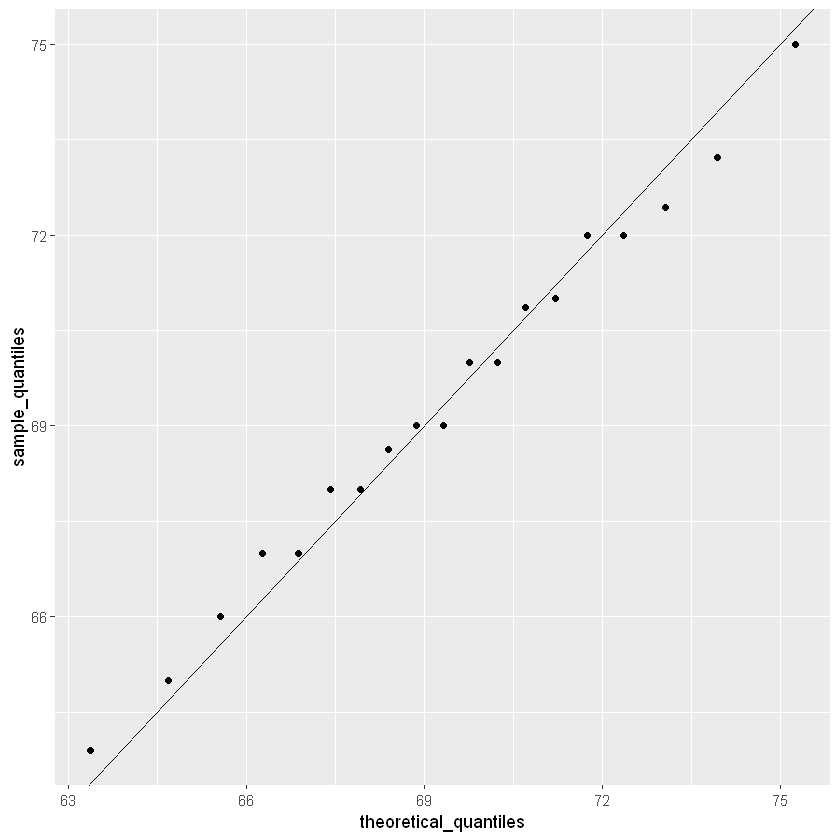

In [17]:
qplot(theoretical_quantiles, sample_quantiles) + geom_abline()

Notice that this code becomes much cleaner if we use standard units:

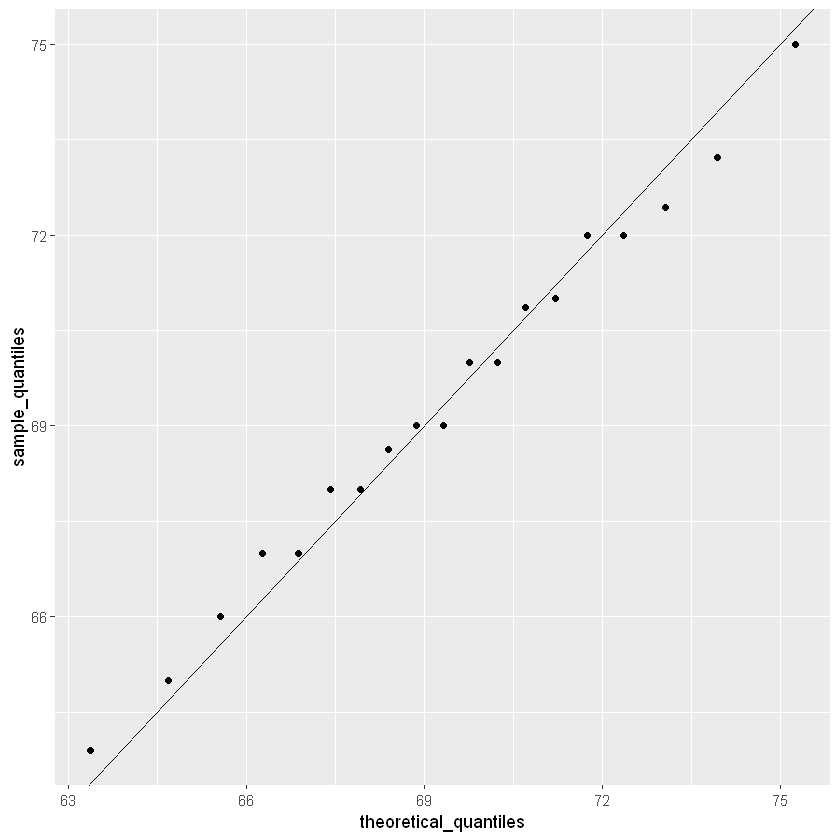

In [18]:
smaple_quantiles <- quantile(z, p)
theoretcial_quantiles <- qnorm(p)
qplot(theoretical_quantiles, sample_quantiles) + geom_abline()

The above code is included to help describe QQ-plots. However, in practice it is easier to use the __ggplot2__ code described in Section 8.16:

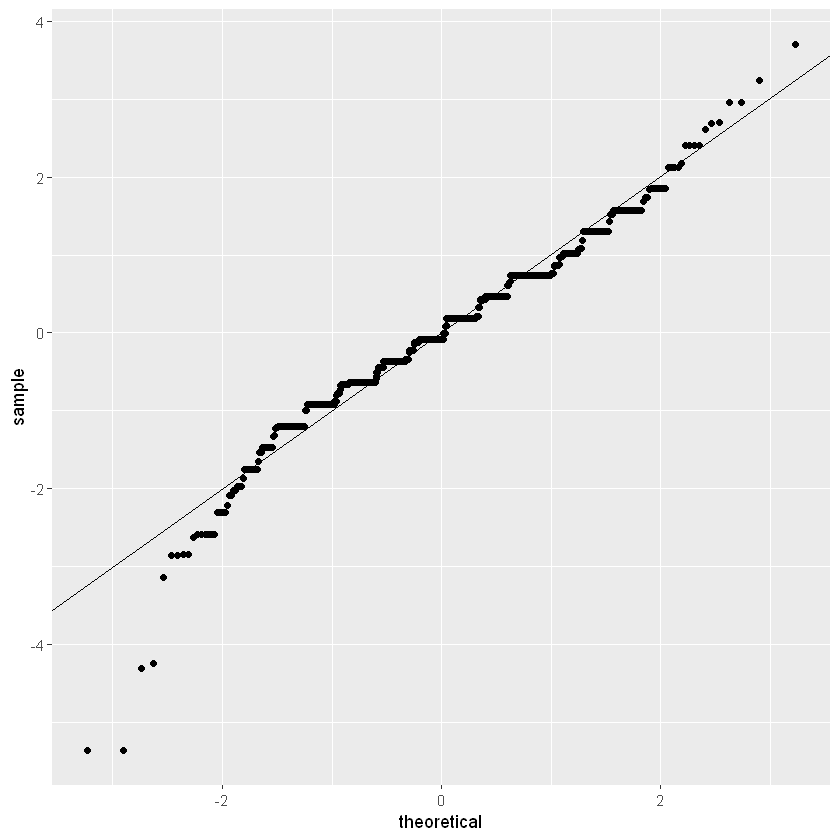

In [19]:
heights %>% filter(sex =="Male") %>%
    ggplot(aes(sample = scale(height))) +
    geom_qq() +
    geom_abline()

While for the illustration above we used 20 quantiles, the default from the `geom_qq` function is to use as many quantiles as data points.

## 8.11 Percentiles

Before we move on, let’s define some terms that are commonly used in exploratory data analysis.

_Percentiles_ are special cases of _quantiles_ that are commonly used. The percentiles are the quantiles you obtain when setting the $p$ at $0.01, 0.02, \ldots, 0.99$. We call, for exmple, the case of $p = 0.25$ the 25th percentile, which gives us a number for which 25% of the data is below. The most famous percentile is the 50th, also known as the _median_.

For the normal distribution the _median_ and average are the same, but this is generally not the case.

Another special case that receives a name are the _quartiles_, which are obtained when setting $p = 0.25, 0.50,and 0.75$


## 8.12 Boxplots

To introduce boxplots we will go back to the US murder data. Suppose we want to summarize the murder rate distribution. Using the data visualization technique we have learned, we can quickly see that the normal approximation does not apply here:

In [20]:
#images

In this case, the histogram above or a smooth density plot would serve as a relatively succinct summary.

Now suppose those used to receiving just two numbers as summaries ask us for a more compact numerical summary.

Here Tukey offered some advice. Provide a five-number summary composed of the range along with the quartiles (the 25th, 50th, and 75th percentiles). Tukey further suggested that we ignore outliers when computing the range and instead plot these as independent points. We provide a detailed explanation of outliers later. Finally, he suggested we plot these numbers as a “box” with “whiskers” like this:

In [21]:
#image

with the box defined by the 25% and 75% percentile and the whiskers showing the range. The distance between these two is called the interquartile range. The two points are outliers according to Tukey’s definition. The median is shown with a horizontal line. Today, we call these boxplots.

From just this simple plot, we know that the median is about 2.5, that the distribution is not symmetric, and that the range is 0 to 5 for the great majority of states with two exceptions.

We discuss how to make boxplots in Section 8.16.

## 8.13 Stratification

In data analysis we often divide observations into groups based on the values of one or more variables associated with those observations. For example in the next section we divide the height values into groups based on a sex variable: females and males. We call this procedure stratification and refer to the resulting groups as _strata_.

Stratification is common in data visualization because we are often interested in how the distribution of variables differs across different subgroups. We will see several examples throughout this part of the book. We will revisit the concept of stratification when we learn regression in Chapter 17 and in the Machine Learning part of the book.


## 8.14 Case study: descirbing student heights (continued)

Using the histogram, density plots, and QQ-plots, we have become convinced that the male height data is well approximated with a normal distribution. In this case, we report back to ET a very succinct summary: male heights follow a normal distribution with an average of 69.3 inches and a SD of 3.6 inches. With this information, ET will have a good idea of what to expect when he meets our male students. However, to provide a complete picture we need to also provide a summary of the female heights.

We learned that boxplots are useful when we want to quickly compare two or more distributions. Here are the heights for men and women:

In [22]:
#image

The plot immediately reveals that males are, on average, taller than females. The standard deviations appear to be similar. But does the normal approximation also work for the female height data collected by the survey? We expect that they will follow a normal distribution, just like males. However, exploratory plots reveal that the approximation is not as useful:



In [23]:
#images

We see something we did not see for the males: the density plot has a second “bump”. Also, the QQ-plot shows that the highest points tend to be taller than expected by the normal distribution. Finally, we also see five points in the QQ-plot that suggest shorter than expected heights for a normal distribution. When reporting back to ET, we might need to provide a histogram rather than just the average and standard deviation for the female heights.

However, go back and read Tukey’s quote. We have noticed what we didn’t expect to see. If we look at other female height distributions, we do find that they are well approximated with a normal distribution. So why are our female students different? Is our class a requirement for the female basketball team? Are small proportions of females claiming to be taller than they are? Another, perhaps more likely, explanation is that in the form students used to enter their heights, `FEMALE` was the default sex and some males entered their heights, but forgot to change the sex variable. In any case, data visualization has helped discover a potential flaw in our data.

Regarding the five smallest values, note that these values are:

In [25]:
heights %>% filter(sex == "Female") %>%
    top_n(5, desc(height)) %>%
    pull(height)

[1] 51 53 55 52 52

Because these are reported heights, a possibility is that the student meant to enter `5'1"`, `5'2"`, `5'3"` or `5'5"`.

## 8.15 Exercises

1. Define variables containing the heights of males and females like this:

In [2]:
library(dslabs)
data(heights)
male <- heights$height[heights$sex == "Male"]
female <- heights$height[heights$sex == "Female"]

How many measurements do we have for each?

In [10]:
a <- length(male)
b <- length(female)
data.frame(male = a, female = b)

male,female
<int>,<int>
812,238


2. Suppose we can’t make a plot and want to compare the distributions side by side. We can’t just list all the numbers. Instead, we will look at the percentiles. Create a five row table showing `female_percentiles` and `male_percentiles` with the 10th, 30th, 50th, 70th, & 90th percentiles for each sex. Then create a data frame with these two as columns.

In [12]:
p <- seq(0.1, 0.9, 0.2)
female_percentiles <- quantile(female, p)
male_percentiles <- quantile(male, p)
data.frame(female_percentiles = female_percentiles, male_percentiles = male_percentiles)

,female_percentiles,male_percentiles
,<dbl>,<dbl>
10%,61.00000,65.00000
30%,63.00000,68.00000
50%,64.98031,69.00000
70%,66.46417,71.00000
90%,69.00000,73.22751


3. Study the following boxplots showing population sizes by country:

In [13]:
# image

Which continent has the country with the biggest population size?

__Answer__: Asia

4. What continent has the largest median population size?

__Answer__: Africa

5. What is median population size for Africa to the nearest million?

__Answer__: 10 millions

6. What proportion of countries in Europe have populations below 14 million?

__Answer__: b. 0.75

7. If we use a log transformation, which continent shown above has the largest interquartile range?

__Answer__; Asia


8. Load the height data set and create a vector `x` with just the male heights:

In [14]:
library(dslabs)
data(heights)
x <- heights$height[heights$sex=="Male"]

What proportion of the data is between 69 and 72 inches (taller than 69, but shorter or equal to 72)? Hint: use a logical operator and `mean`.



In [25]:
sum(x >69 & x < 72) / length(x)

[1] 0.2278325

9. Suppose all you know about the data is the average and the standard deviation. Use the normal approximation to estimate the proportion you just calculated. Hint: start by computing the average and standard deviation. Then use the `pnorm` function to predict the proportions.



In [36]:
a<- pnorm(69, mean = mean(x), sd(x))
b<- pnorm(72, mean = mean(x), sd(x))
b-a

[1] 0.3061779

10. Notice that the approximation calculated in question nine is very close to the exact calculation in the first question. Now perform the same task for more extreme values. Compare the exact calculation and the normal approximation for the interval (79,81]. How many times bigger is the actual proportion than the approximation?



In [34]:
a <- sum(x > 79 & x <= 81) / length(x)
b <- pnorm(79, mean = mean(x), sd(x))
c <- pnorm(81, mean = mean(x), sd(x))
a/(c-b)

[1] 1.614261

11. Approximate the distribution of adult men in the world as normally distributed with an average of 69 inches and a standard deviation of 3 inches. Using this approximation, estimate the proportion of adult men that are 7 feet tall or taller, referred to as _seven footers_. Hint: use the `pnorm` function.



In [41]:
1-pnorm(84, mean = mean(x), sd(x))


[1] 2.383343e-05

12. There are about 1 billion men between the ages of 18 and 40 in the world. Use your answer to the previous question to estimate how many of these men (18-40 year olds) are seven feet tall or taller in the world?



In [43]:
a <- 10^9 *(1-pnorm(84, mean = mean(x), sd(x)))
a

[1] 23833.43

13. There are about 10 National Basketball Association (NBA) players that are 7 feet tall or higher. Using the answer to the previous two questions, what proportion of the world’s 18-to-40-year-old seven footers are in the NBA?



In [45]:
10/a

[1] 0.0004195788

14. Repeat the calculations performed in the previous question for Lebron James’ height: 6 feet 8 inches. There are about 150 players that are at least that tall.



In [48]:
b <- 10^9 +(1-pnorm(80, mean = mean(x), sd(x)))
150/b

[1] 1.5e-07

15. In answering the previous questions, we found that it is not at all rare for a seven footer to become an NBA player. What would be a fair critique of our calculations:

 a. Practice and talent are what make a great basketball player, not height.
 
 b. The normal approximation is not appropriate for heights.
 
 c. As seen in question 10, the normal approximation tends to underestimate the extreme values. It’s possible that there are more seven footers than we predicted.
 
 d. As seen in question 10, the normal approximation tends to overestimate the extreme values. It’s possible that there are fewer seven footers than we predicted.
 
 __Andswer__: d

## 8.16 ggplpot2 geometries

In Chapter 7, we introduced the __ggplot2__ package for data visualization. Here we demonstrate how to generate plots related to distributions, specifically the plots shown earlier in this chapter.

### 8.16.1 Barplots

To generate a barplot we can use the `geom_bar` geometry. The default is to count the number of each category and draw a bar. Here is the plot for the regions of the US.

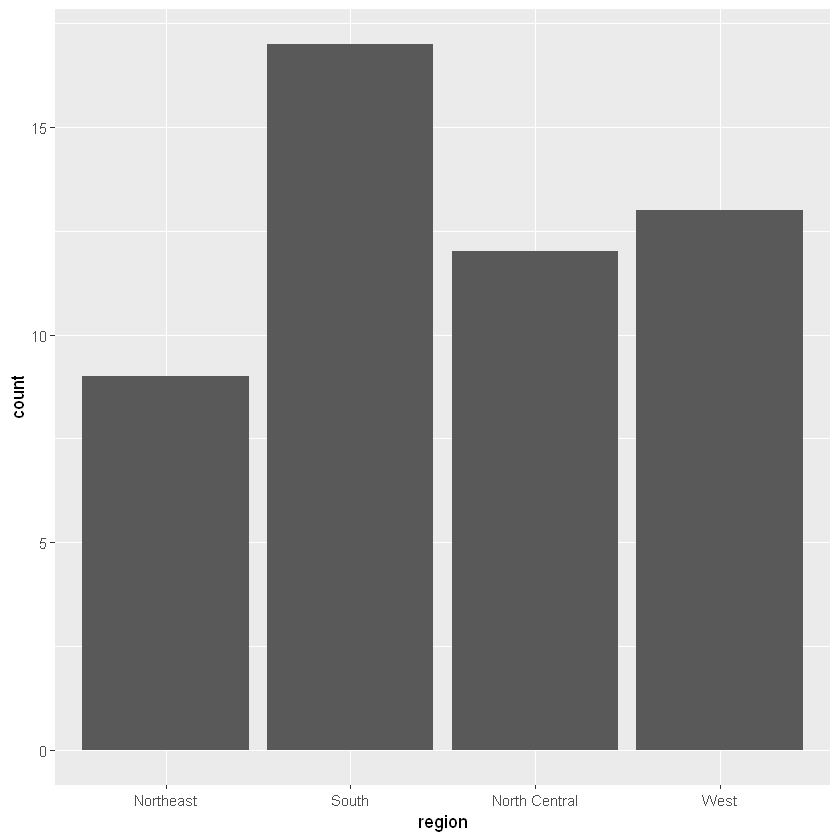

In [50]:
murders %>% ggplot(aes(region)) + geom_bar()

We often already have a table with a distribution that we want to present as a barplot. Here is an example of such a table:

In [51]:
data(murders)
tab <- murders %>%
    count(region) %>%
    mutate(proportion = n/sum(n))
tab

region,n,proportion
<fct>,<int>,<dbl>
Northeast,9,0.1764706
South,17,0.3333333
North Central,12,0.2352941
West,13,0.2549020


We no longer want `geom_bar` to count, but rather just plot a bar to the height provided by the `proportion` variable. For this we need to provide `x` (the categories) and `y` (the values) and use the `stat="identity"` option.

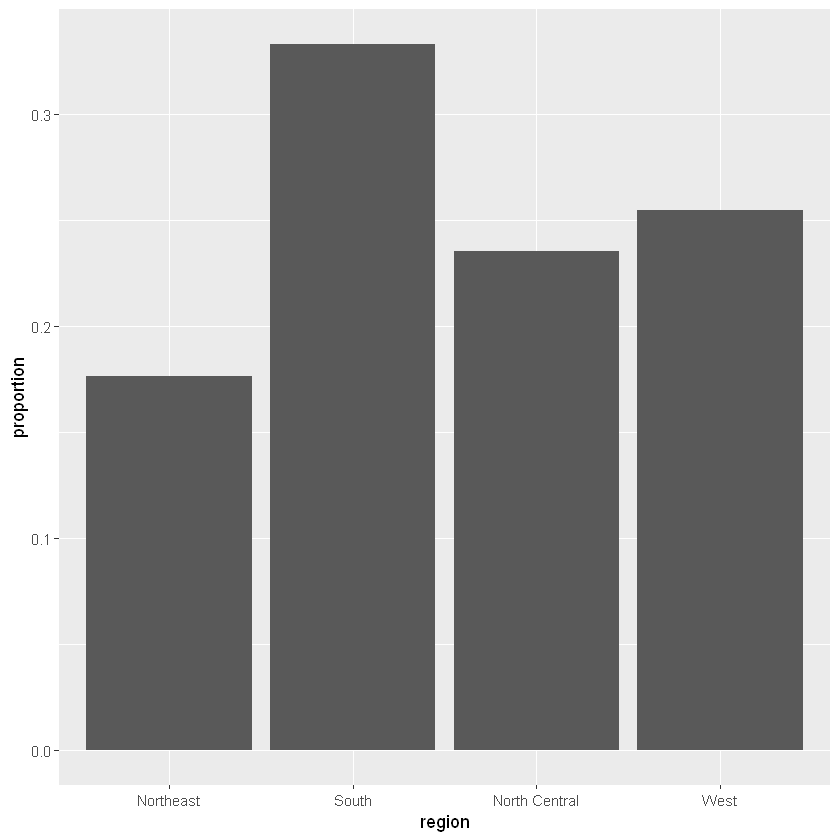

In [52]:
tab %>% ggplot(aes(region, proportion)) +
    geom_bar(stat = "identity")

### 8.16.2 Histograms

To generate histograms we use `geom_histogram`. By looking at the help file for this function, we learn that the only required argument is `x`, the variable for which we will construct a histogram. We dropped the `x` because we know it is the first argument. The code looks like this:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



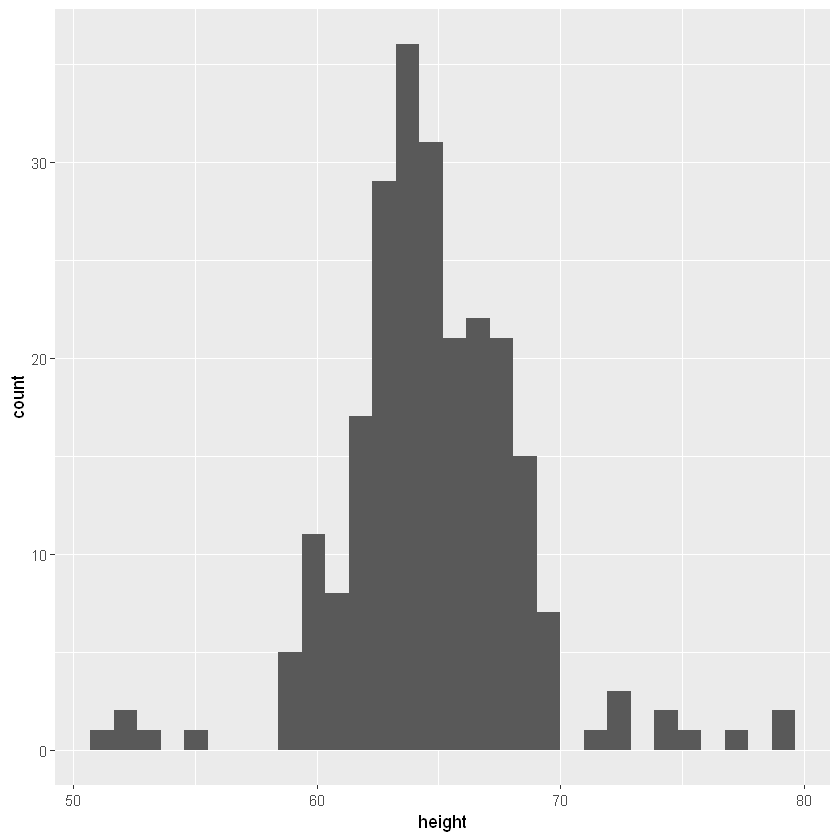

In [53]:
heights %>%
    filter(sex == "Female") %>%
    ggplot(aes(height)) +
    geom_histogram()

If we run the code above, it gives us a message:

   `stat_bin()` using `bins = 30`. Pick better value with binwidth.

We previously used a bin size of 1 inch, so the code looks like this:

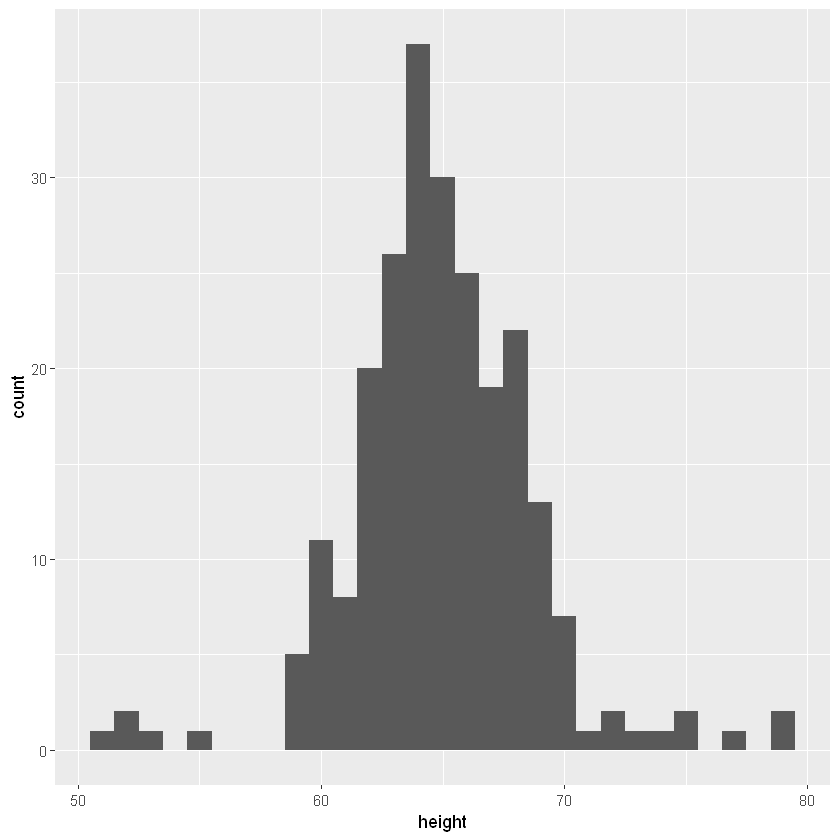

In [56]:
heights %>%
    filter(sex =="Female") %>%
    ggplot(aes(height)) +
    geom_histogram(binwidth = 1)

Finally, if for aesthetic reasons we want to add color, we use the arguments described in the help file. We also labels and a title:

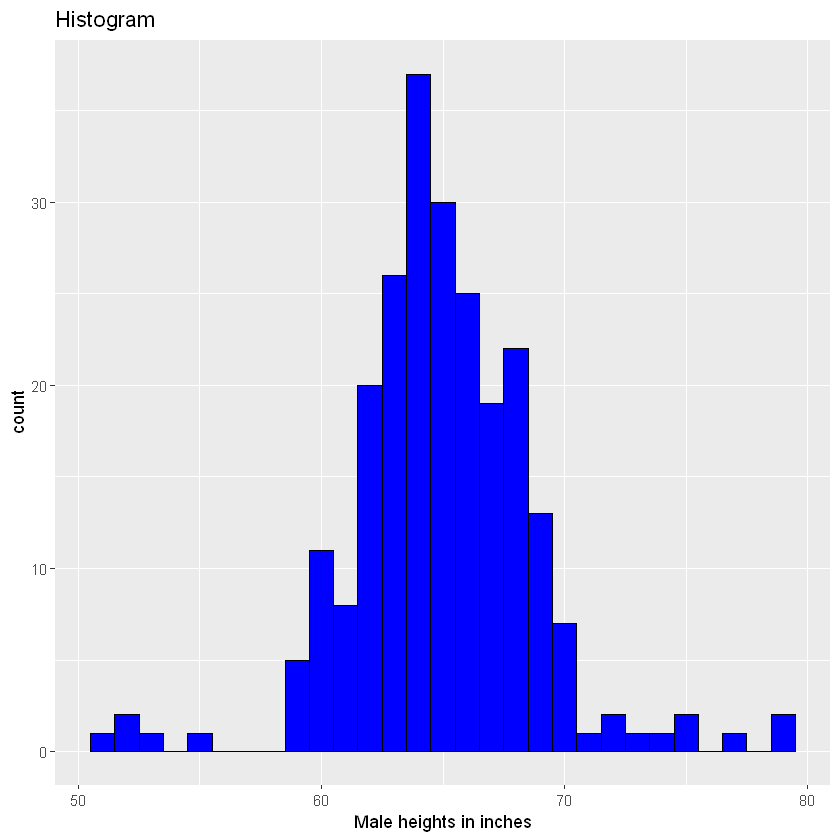

In [57]:
heights %>%
    filter(sex == "Female") %>%
    ggplot(aes(height)) +
    geom_histogram(binwidth = 1, fill = "blue", col = "black") +
    labs(x = "Male heights in inches",
        title = "Histogram")

### 8.16.3 Density plots

To create a smooth density, we use the `geom_density`. To make a smooth density plot with the data previously shown as a histogram we can use this code:

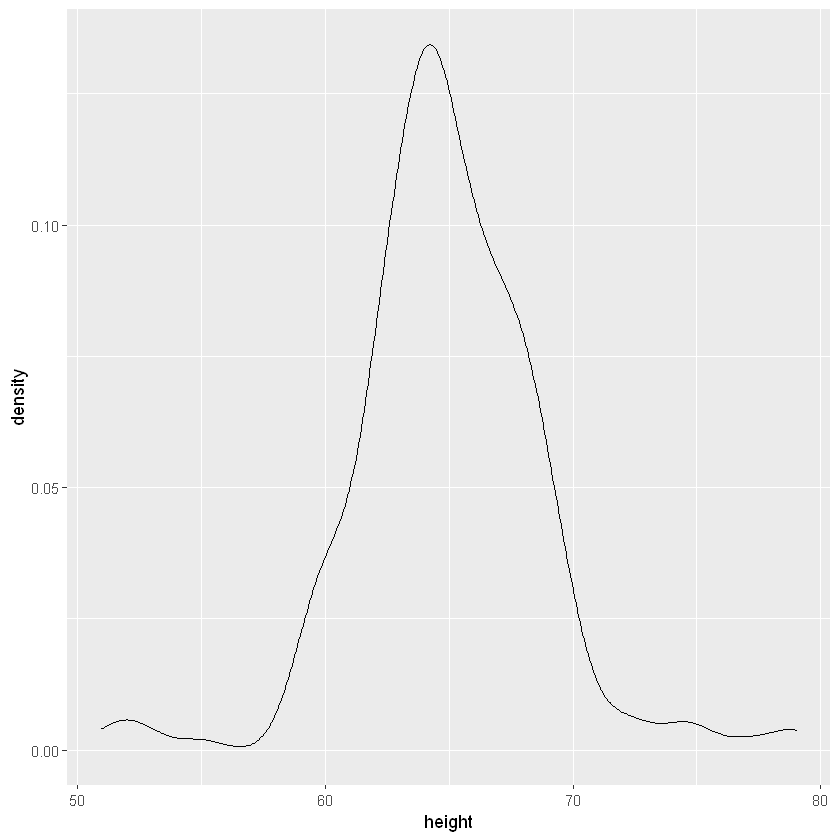

In [58]:
heights %>%
    filter(sex == "Female") %>%
    ggplot(aes(height)) +
    geom_density()

To fill with color, we can use the `fill` argument.

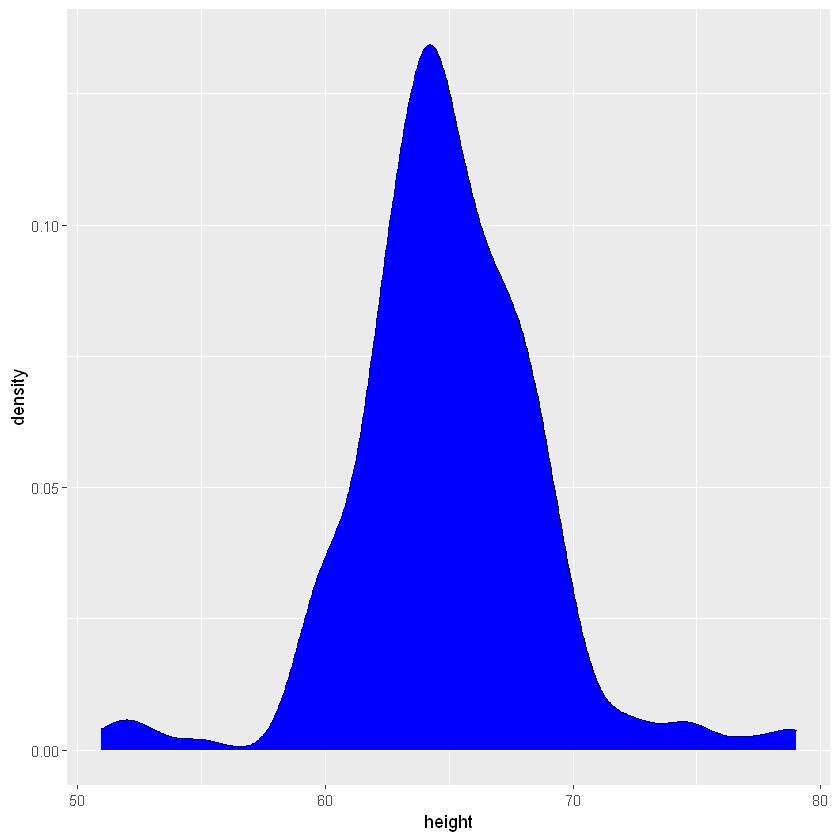

In [59]:
heights %>%
    filter(sex == "Female") %>%
    ggplot(aes(height)) +
    geom_density(fill="blue")

To change the smoothness of the density, we use the `adjust` argument to multiply the default value by that `adjust`. For example, if we want the bandwidth to be twice as big we use:

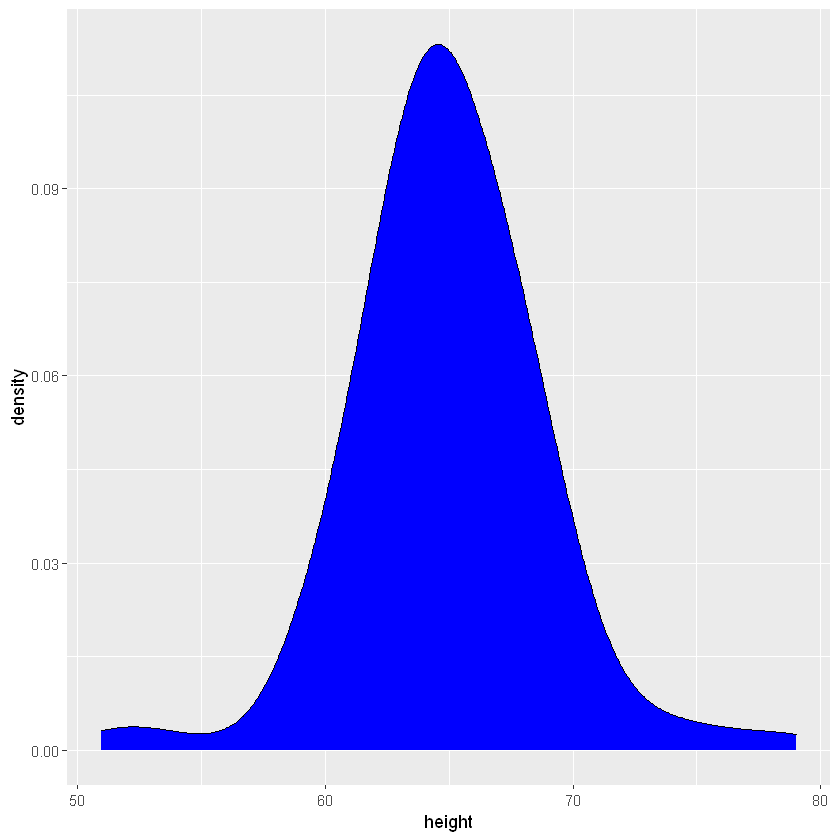

In [61]:
heights %>%
    filter(sex =="Female") %>%
    ggplot(aes(height)) +
    geom_density(fill = "blue", adjust = 2)

### 8.16.4 Boxplots

The geometry for boxplot is `geom_boxplot`. As discussed, boxplots are useful for comparing distributions. For example, below are the previously shown heights for women, but compared to men. For this geometry, we need arguments `x` as the categories, and `y` as the values.



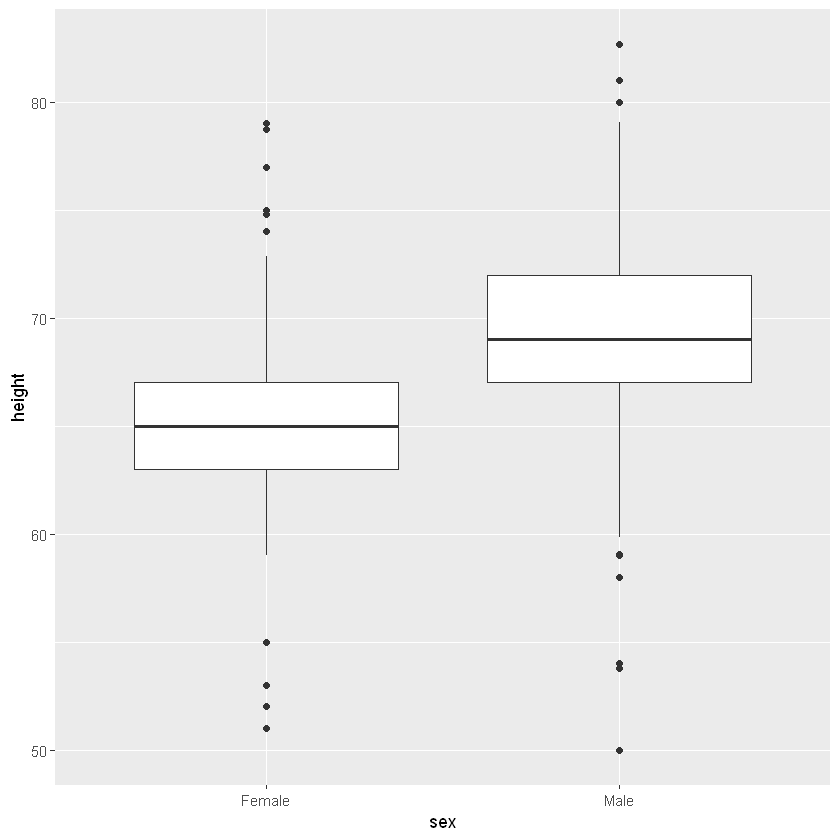

In [65]:
heights %>% ggplot(aes(sex, height)) +
    geom_boxplot()

### 8.16.5 QQ-plots

For qq-plots we use the `geom_qq` geometry. From the help file, we learn that we need to specify the `sample` (we will learn about samples in a later chapter). Here is the qqplot for men heights.

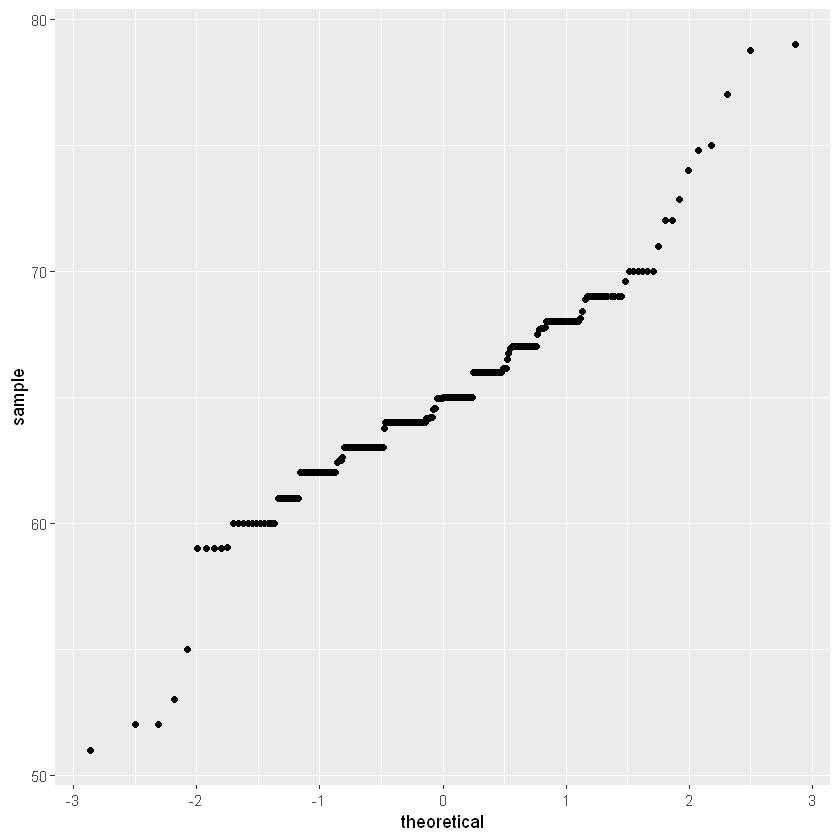

In [66]:
heights %>% filter(sex =="Female") %>%
    ggplot(aes(sample = height)) +
    geom_qq()

By default, the sample variable is compared to a normal distribution with average 0 and standard deviation 1. To change this, we use the `dparams` arguments based on the help file. Adding an identity line is as simple as assigning another layer. For straight lines, we use the `geom_abline` function. The default line is the identity line (slope = 1, intercept = 0).

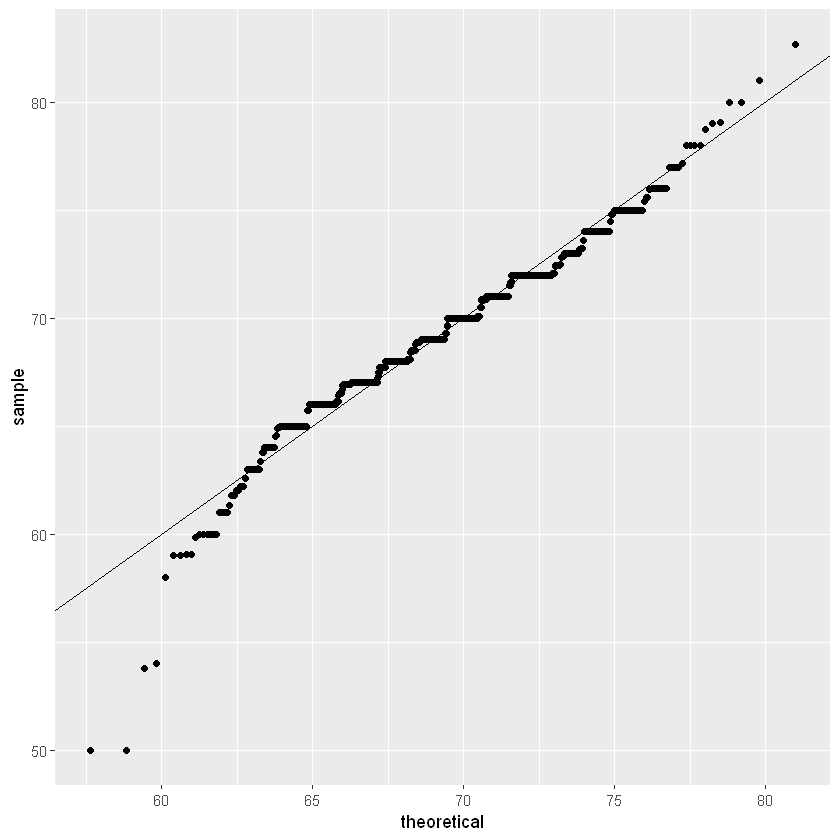

In [67]:
params <- heights %>% filter(sex == "Male") %>%
    summarize(mean = mean(height), sd = sd(height))

heights %>% filter(sex == "Male") %>%
    ggplot(aes(sample = height)) +
    geom_qq(dparams = params) +
    geom_abline()

Another option here is to scale the data first and then make a qqplot against the standard normal.

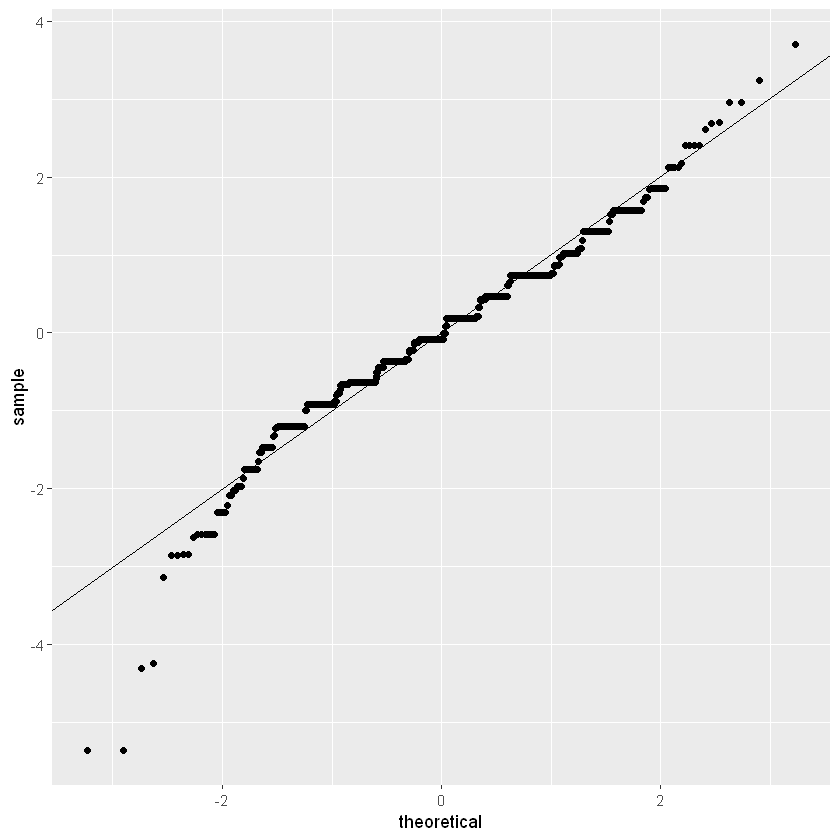

In [69]:
heights %>%
    filter(sex == "Male") %>%
    ggplot(aes(sample = scale(height))) +
    geom_qq() +
    geom_abline()

### 8.16.6 Images

Images were not needed for the concepts described in this chapter, but we will use images in Section 10.14, so we introduce the two geometries used to create images: __geom_tile__ and __geom_raster__. They behave similarly; to see how they differ, please consult the help file. To create an image in __ggplot2__ we need a data frame with the x and y coordinates as well as the values associated with each of these. Here is a data frame.

In [71]:
x <- expand.grid(x = 1:12, y = 1:10) %>%
    mutate(z = 1:120)
x
matrix(1:120, 12, 10)

x,y,z
<int>,<int>,<int>
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


1,13,25,37,49,61,73,85,97,109
2,14,26,38,50,62,74,86,98,110
3,15,27,39,51,63,75,87,99,111
4,16,28,40,52,64,76,88,100,112
5,17,29,41,53,65,77,89,101,113
6,18,30,42,54,66,78,90,102,114
7,19,31,43,55,67,79,91,103,115
8,20,32,44,56,68,80,92,104,116
9,21,33,45,57,69,81,93,105,117
10,22,34,46,58,70,82,94,106,118
11,23,35,47,59,71,83,95,107,119


Note that this is the tidy version of a matrix, `matrix(1:120, 12, 10)`. To plot the image we use the following code:

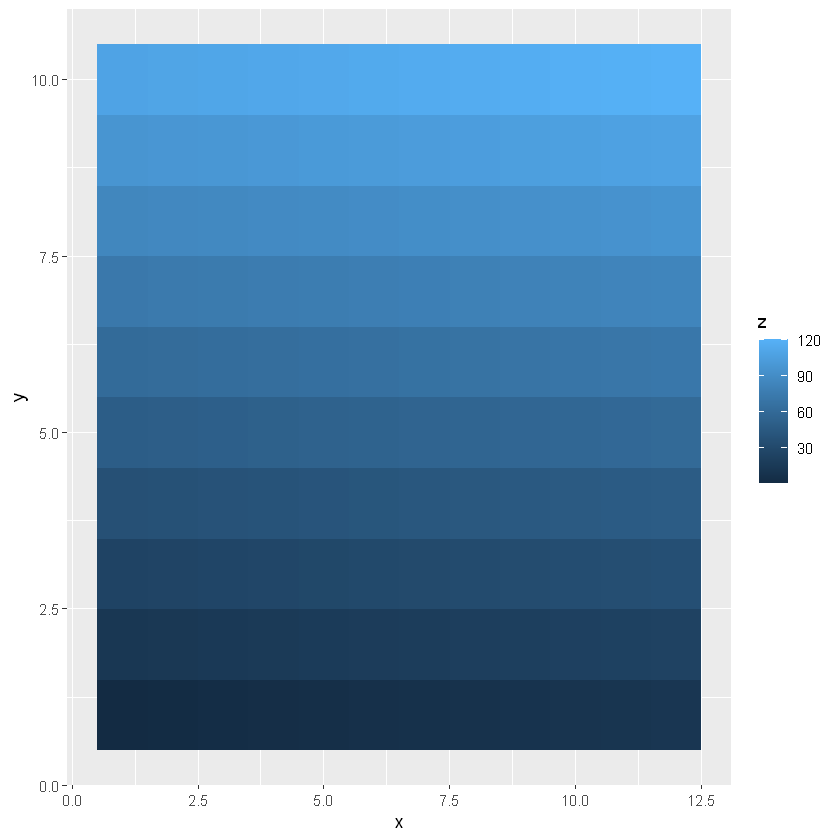

In [72]:
x %>% ggplot(aes(x, y, fill = z)) +
    geom_raster()

With these images you will often want to change the color scale. This can be done through the `scale_fill_gradientn` layer.

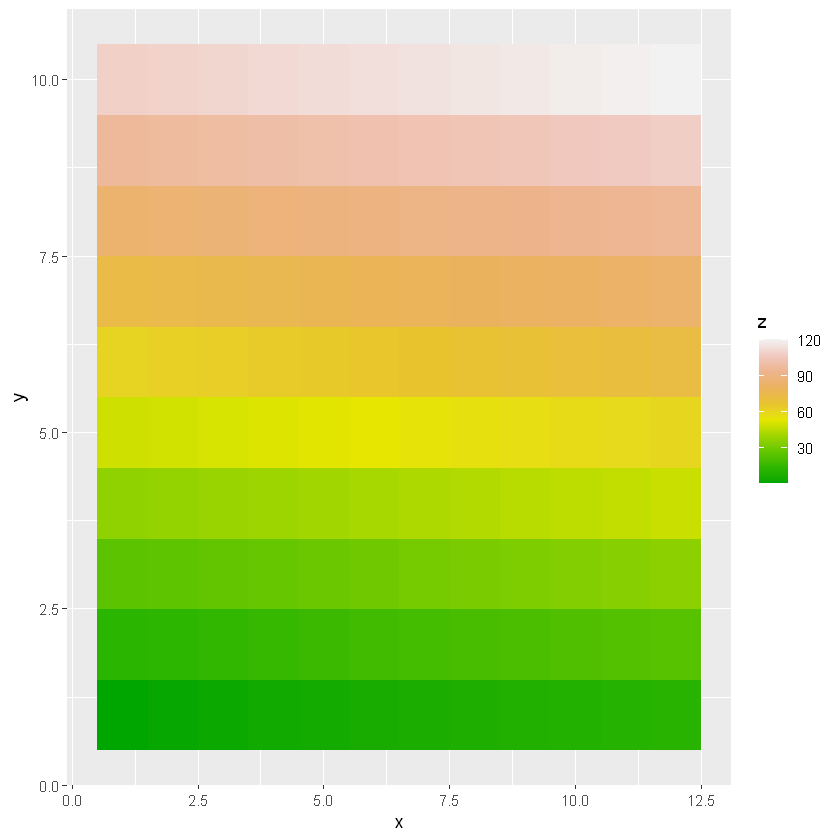

In [74]:
x %>% ggplot(aes(x, y, fill = z)) +
    geom_raster() +
    scale_fill_gradientn(colors = terrain.colors(10))

### 8.16.7 Quick plots

In Section 7.13 we introduced `qplot` as a useful function when we need to make a quick scatterplot. We can also use `qplot` to make histograms, density plots, boxplot, qqplots and more. Although it does not provide the level of control of `ggplot`, `qplot` is definitely useful as it permits us to make a plot with a short snippet of code.

Suppose we have the male heights in an object `x`:

In [4]:
x <- heights %>%
    filter(sex == "Male") %>%
    pull(height)

To make a quick histogram we can use:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



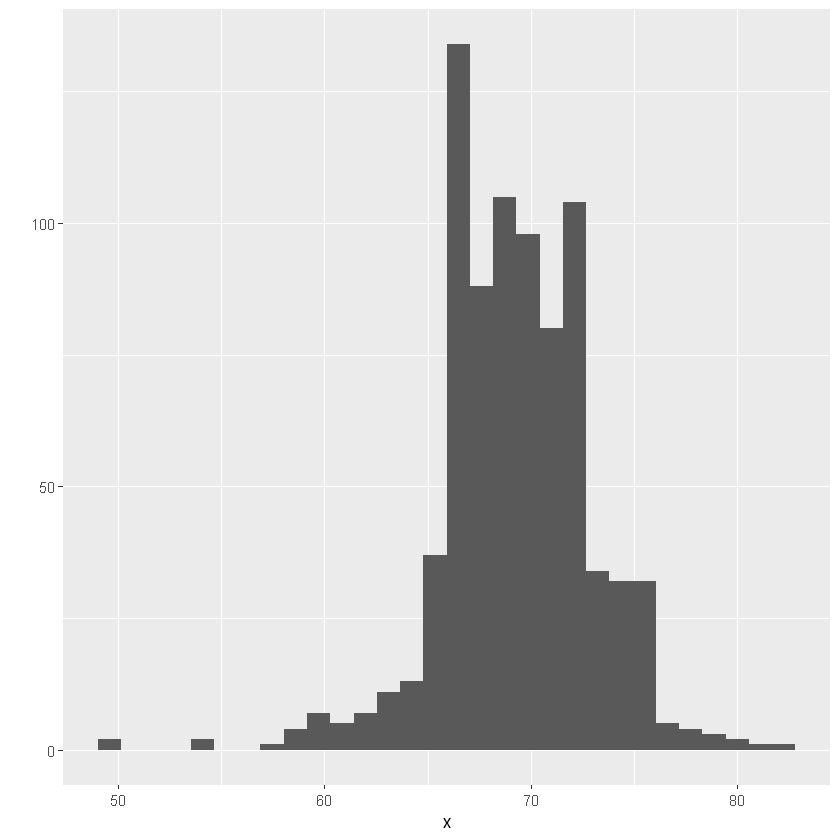

In [76]:
qplot(x)

The function guesses that we want to make a histogram because we only supplied one variable. In Section 7.13 we saw that if we supply `qplot` two variables, it automatically makes a scatterplot.

To make a quick qqplot you have to use the `sample` argument. Note that we can add layers just as we do with ggplot.

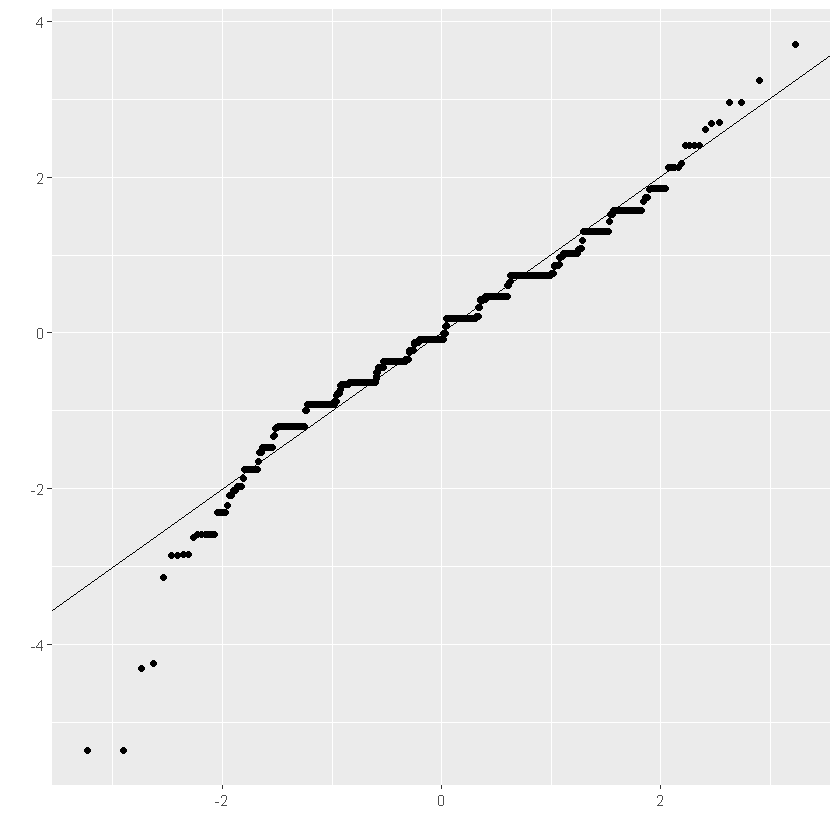

In [77]:
qplot(sample = scale(x)) + geom_abline()

If we supply a factor and a numeric vector, we obtain a plot like the one below. Note that in the code below we are using the `data` argument. Because the data frame is not the first argument in `qplot`, we have to use the dot operator.

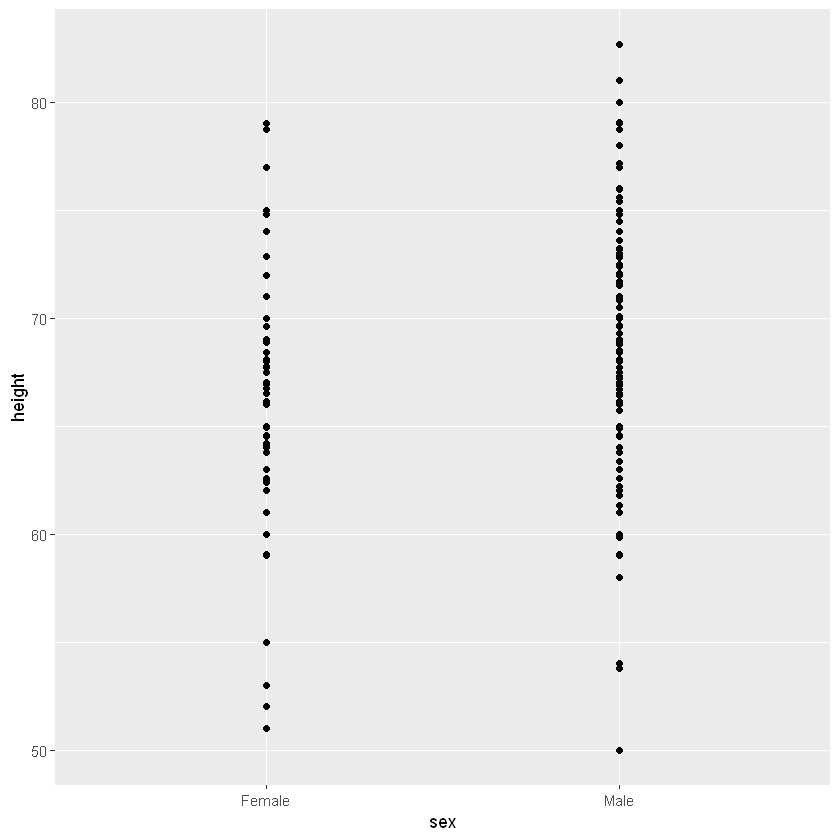

In [78]:
heights %>% qplot(sex, height, data = .)

We can also select a specific geometry by using the `geom` argument. So to convert the plot above to a boxplot, we use the following code:

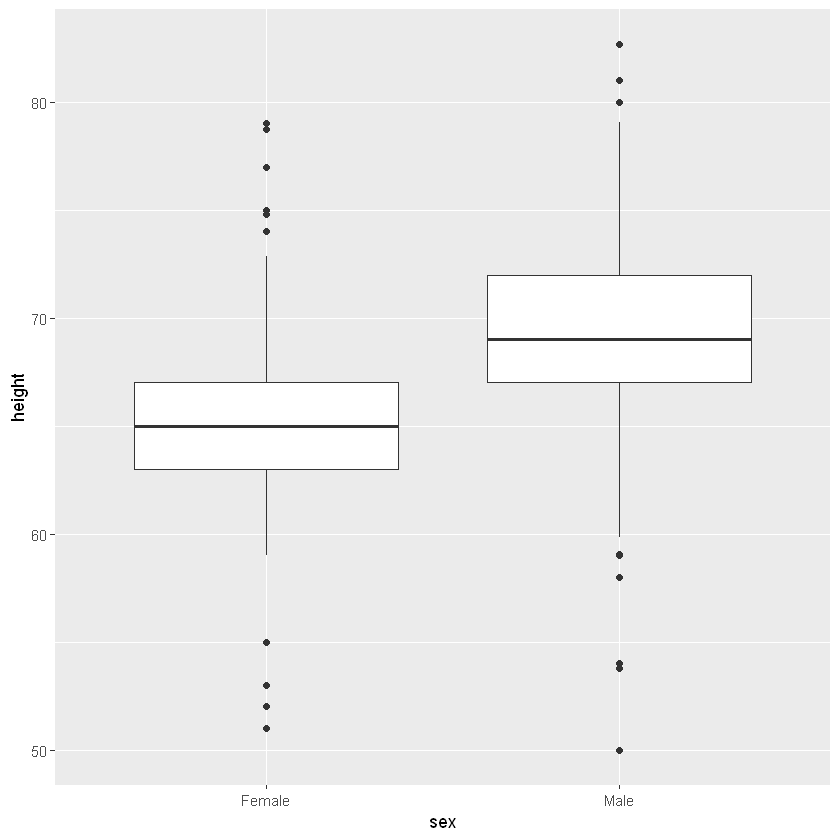

In [2]:
heights %>% qplot(sex, height, data = ., geom = "boxplot")

We can also use the `geom` arguments to generate a density plot instead of a histogram:

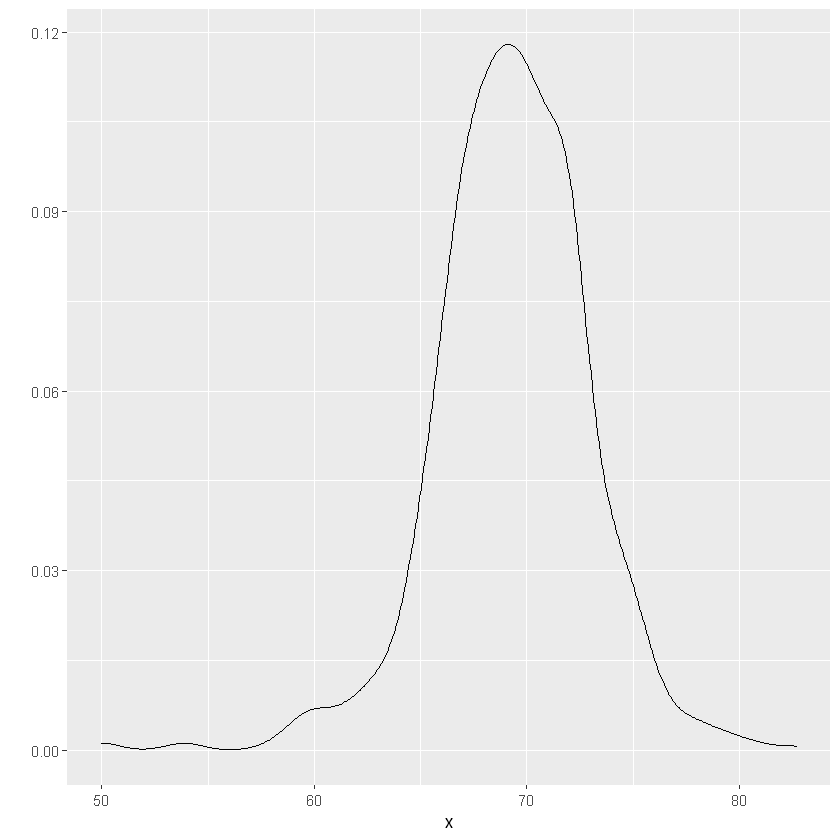

In [5]:
qplot(x, geom = "density")

Although not as much as with `ggplot`, we do have some flexibility to improve the results of `qplot`. Looking at the help file we see several ways in which we can improve the look of histogram above. Here is an example:

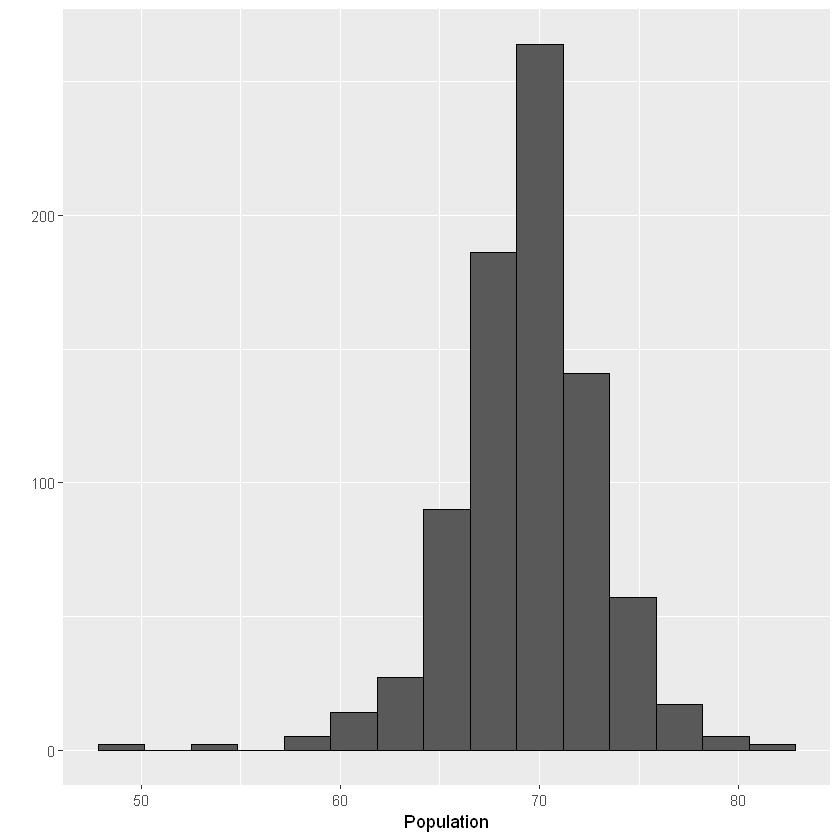

In [6]:
qplot(x, bins=15, color = I("black"), xlab = "Population")

__Technical note__: The reason we use `I("black")` is because we want `qplot` to treat `"black"` as a character rather than convert it to a factor, which is the default behavior within `aes`, which is internally called here. In general, the function `I` is used in R to say “keep it as it is”.

## 8.17 Exercises

1. Now we are going to use the `geom_histogram` function to make a histogram of the heights in the `height` data frame. When reading the documentation for this function we see that it requires just one mapping, the values to be used for the histogram. Make a histogram of all the plots.

What is the variable containing the heights?

 a. `sex`
 
 b. `heights`
 
 c. `height`
 
 d. `heights$height`

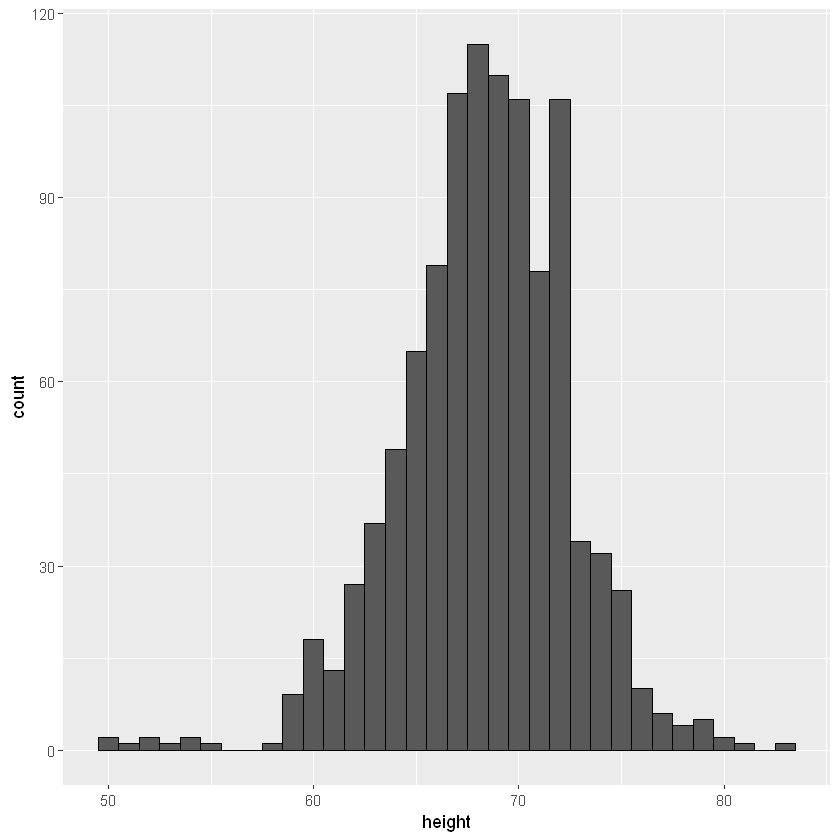

In [7]:
# Answer: c

heights %>% ggplot(aes(height)) +
    geom_histogram(binwidth = 1, col = "black")

2. Now create a ggplot object using the pipe to assign the heights data to a ggplot object. Assign `height` to the x values through the aes function.

In [9]:
h <- heights %>% ggplot(aes(x = height))

3. Now we are ready to add a layer to actually make the histogram. Use the object created in the previous exercise and the `geom_histogram` function to make the histogram.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



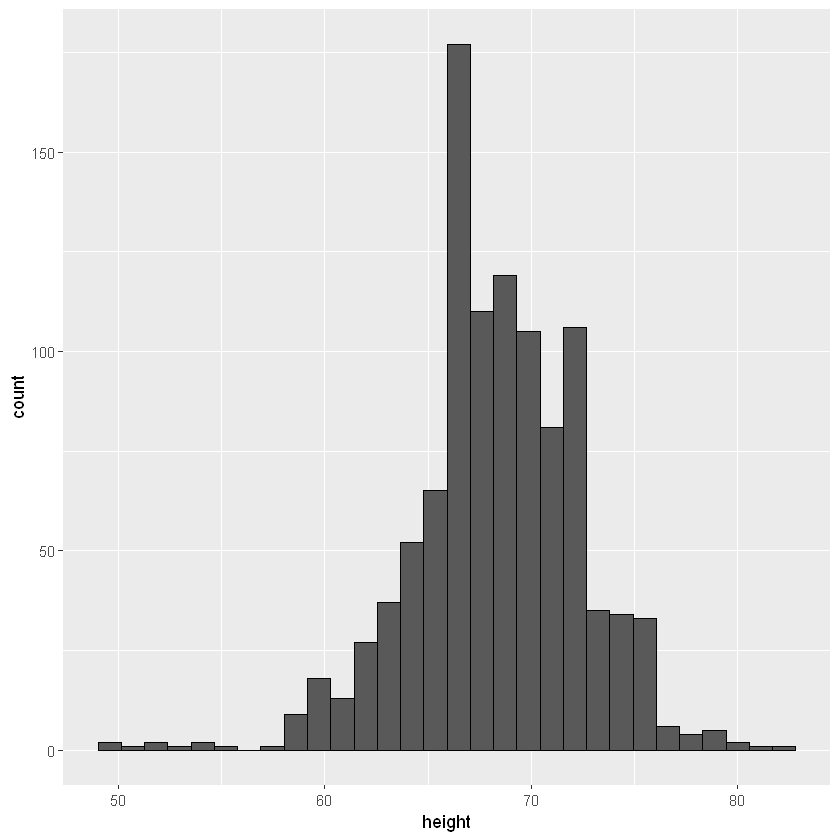

In [11]:
h + geom_histogram(col = "black")

4. Note that when we run the code in the previous exercise we get the warning: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

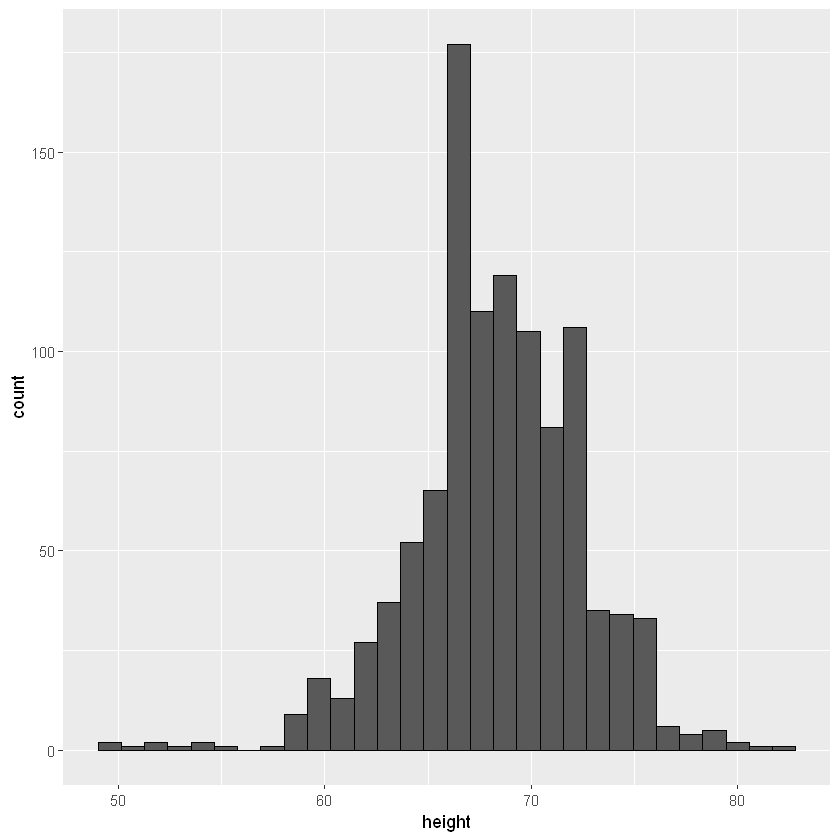

In [13]:
h + geom_histogram(bins = 30, col = "black")

Use the `binwidth` argument to change the histogram made in the previous exercise to use bins of size 1 inch.

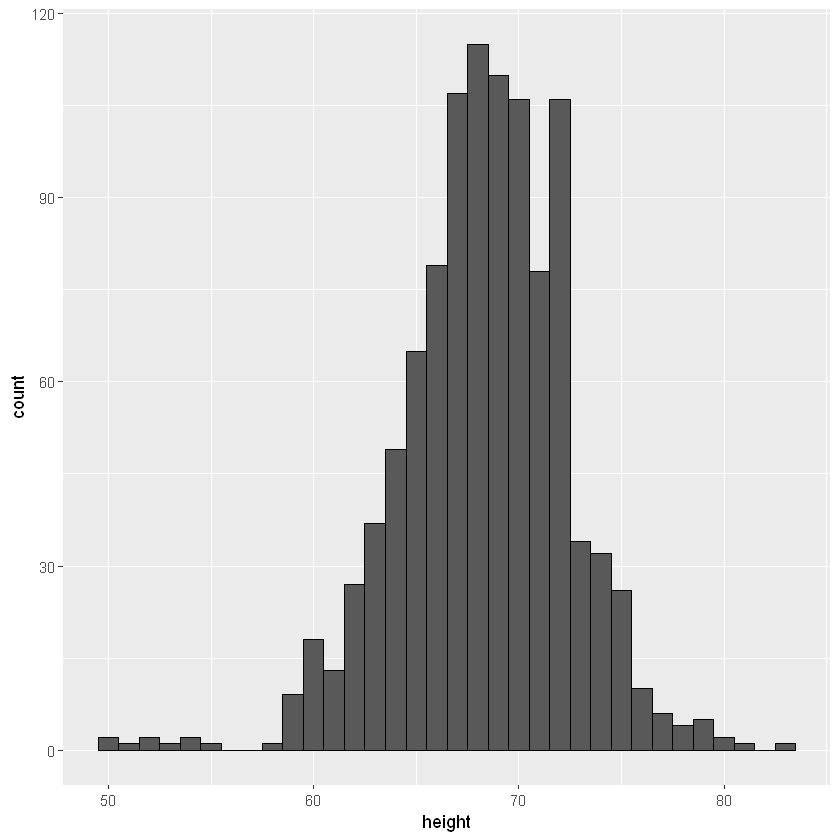

In [14]:
h + geom_histogram(binwidth = 1, col = 'black')

5. Instead of a histogram, we are going to make a smooth density plot. In this case we will not make an object, but instead render the plot with one line of code. Change the geometry in the code previously used to make a smooth density instead of a histogram.

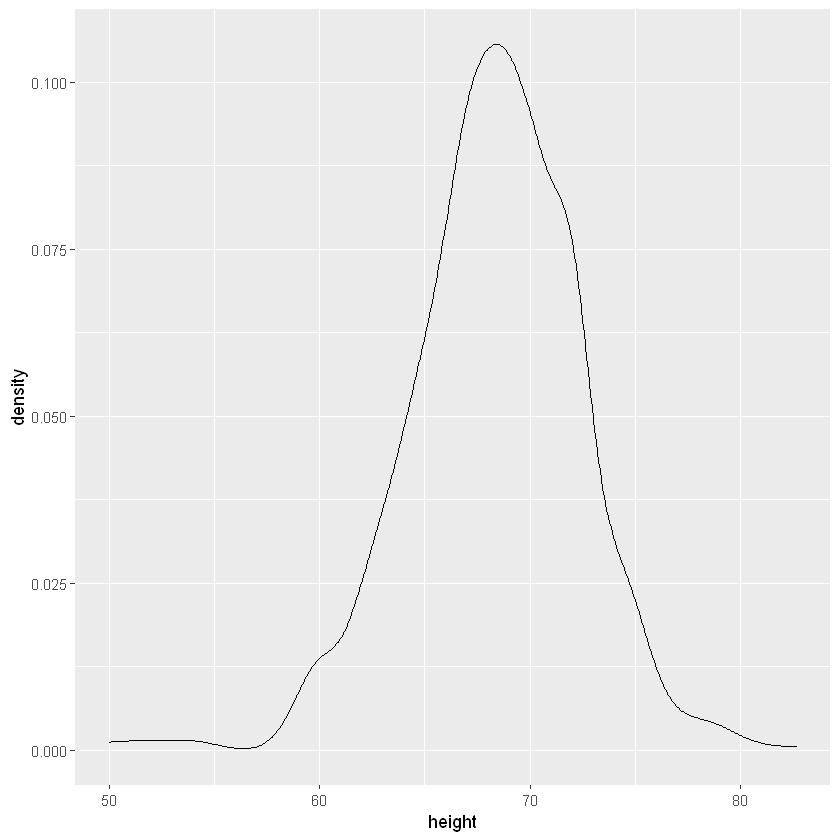

In [15]:
h + geom_density()

6. Now we are going to make a density plot for males and females separately. We can do this using the `group` argument. We assign groups via the aesthetic mapping as each point needs to a group before making the calculations needed to estimate a density.

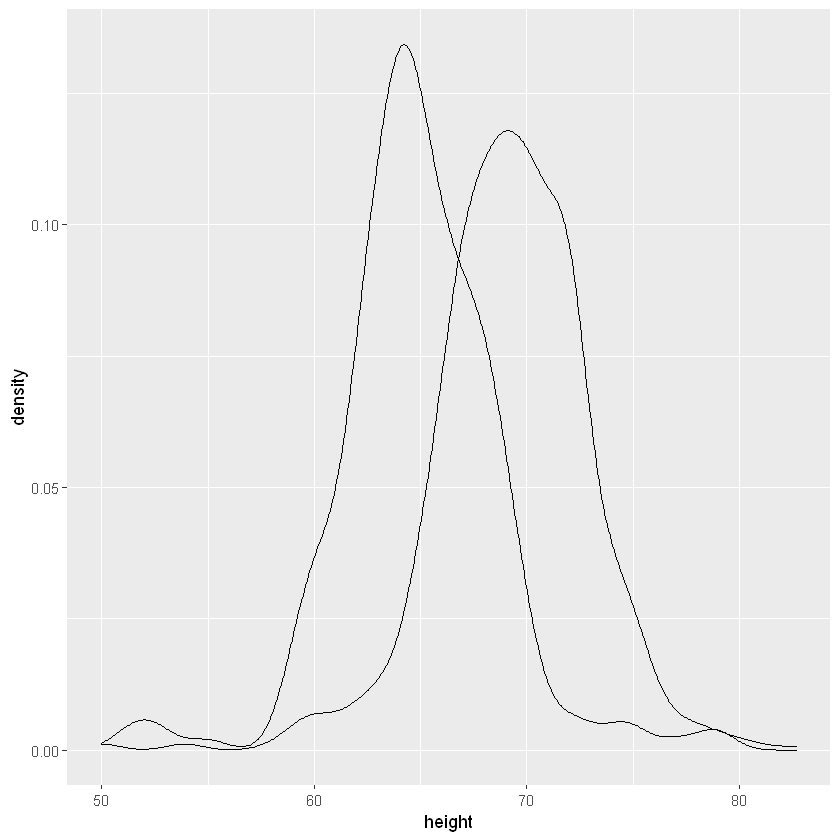

In [16]:
h + geom_density(aes(group = sex))

7. We can also assign groups through the `color` argument. This has the added benefit that it uses color to distinguish the groups. Change the code above to use color.

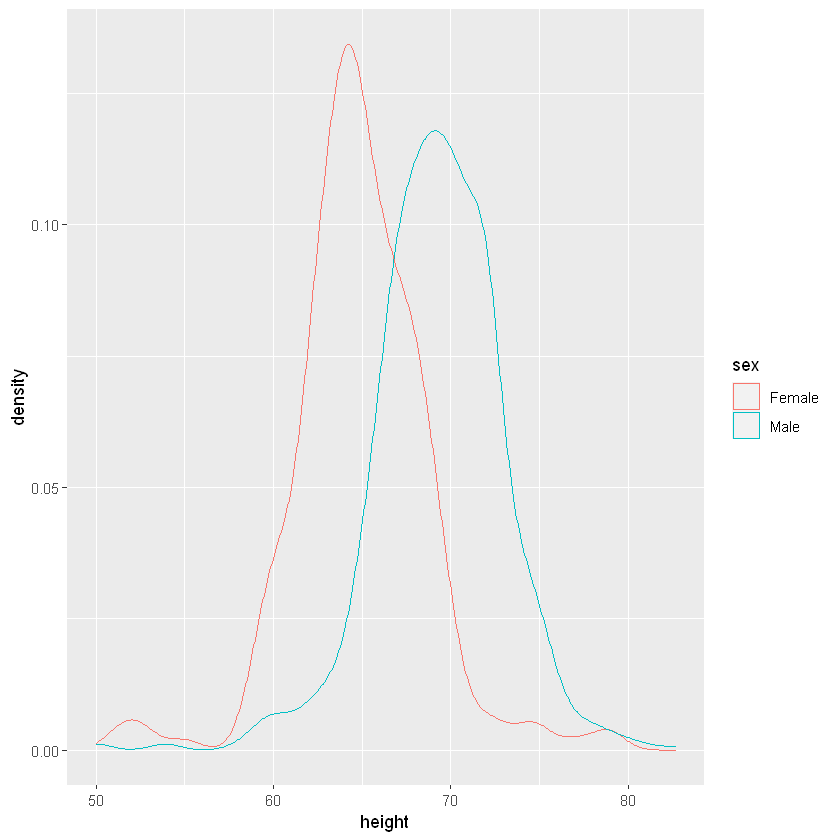

In [17]:
h + geom_density(aes(group = sex, color = sex))

8. We can also assign groups through the `fill` argument. This has the added benefit that it uses colors to distinguish the groups, like this:

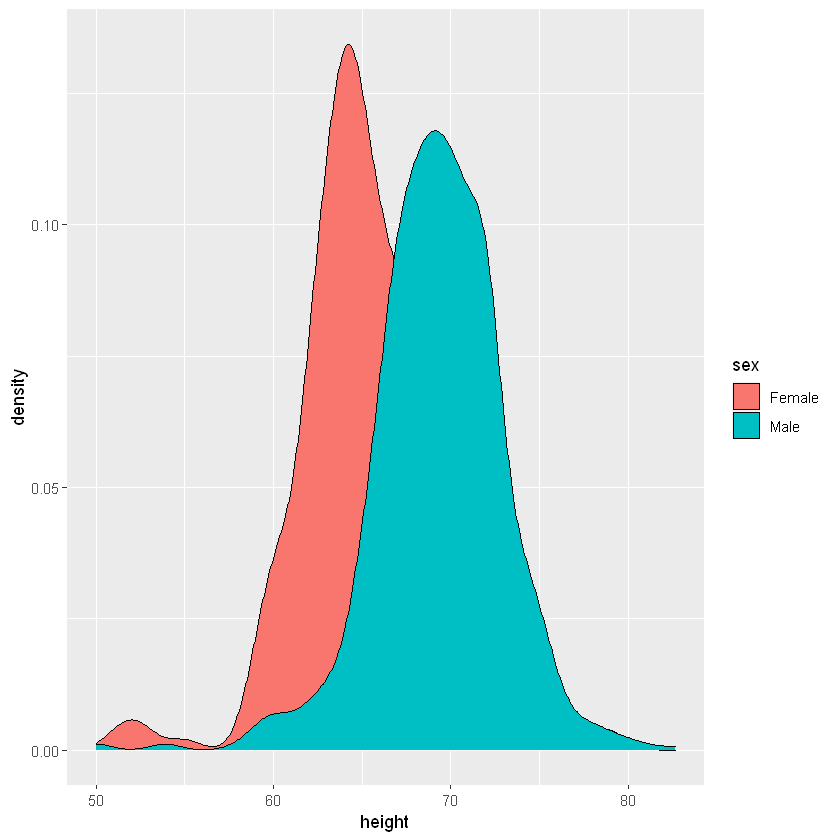

In [19]:
heights %>% 
    ggplot(aes(height, fill = sex)) +
    geom_density()

However, here the second density is drawn over the other. We can make the curves more visible by using alpha blending to add transparency. Set the alpha parameter to 0.2 in the `geom_density` function to make this change.

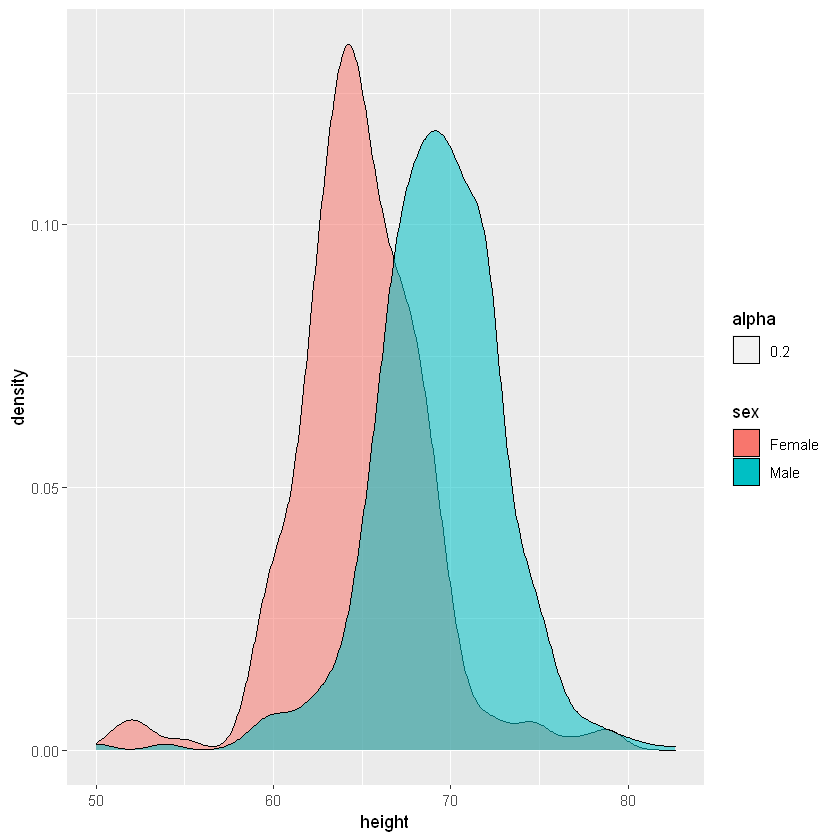

In [21]:
h + geom_density(aes(group = sex, alpha = 0.2, fill = sex))